In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,2,4,2,0,0,0,0,0,0,0,...,0,0.18,0.31,0,1,0,0,1,0,0
1,5,2,16,0,0,0,0,0,0,0,...,0,0.31,0.40,0,0,0,0,1,0,0
2,7,4,4,0,0,0,0,0,0,0,...,0,0.73,0.78,0,0,0,0,1,0,0
3,9,0,9,0,1,1,1,0,0,0,...,0,0.86,0.69,0,0,0,0,1,0,0
4,10,300,8,0,0,0,0,0,40,100,...,0,0.00,0.00,0,0,0,0,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58919 entries, 0 to 58918
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sku                58919 non-null  int64  
 1   national_inv       58919 non-null  int64  
 2   lead_time          58919 non-null  int64  
 3   in_transit_qty     58919 non-null  int64  
 4   forecast_3_month   58919 non-null  int64  
 5   forecast_6_month   58919 non-null  int64  
 6   forecast_9_month   58919 non-null  int64  
 7   sales_1_month      58919 non-null  int64  
 8   sales_3_month      58919 non-null  int64  
 9   sales_6_month      58919 non-null  int64  
 10  sales_9_month      58919 non-null  int64  
 11  min_bank           58919 non-null  int64  
 12  potential_issue    58919 non-null  int64  
 13  pieces_past_due    58919 non-null  int64  
 14  perf_6_month_avg   58919 non-null  float64
 15  perf_12_month_avg  58919 non-null  float64
 16  local_bo_qty       589

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sku,58919.0,42053.601249,24301.057174,2.0,21068.50,41948.00,63047.00,84171.0
national_inv,58919.0,199.403927,1529.148278,-401.0,3.00,11.00,54.00,75813.0
lead_time,58919.0,6.915698,3.522995,0.0,4.00,8.00,8.00,28.0
in_transit_qty,58919.0,17.140753,117.750387,0.0,0.00,0.00,0.00,3872.0
forecast_3_month,58919.0,87.252890,497.820231,0.0,0.00,0.00,12.00,15600.0
forecast_6_month,58919.0,162.178567,913.339877,0.0,0.00,0.00,26.00,29200.0
forecast_9_month,58919.0,237.743784,1345.784311,0.0,0.00,0.00,40.00,43000.0
sales_1_month,58919.0,25.505202,136.604848,0.0,0.00,0.00,6.00,4934.0
sales_3_month,58919.0,82.252991,430.185496,0.0,0.00,2.00,18.00,13554.0
sales_6_month,58919.0,163.349140,860.764496,0.0,0.00,4.00,35.00,26299.0


In [6]:
df.shape

(58919, 23)

缺失值检查与处理

In [7]:
# 虽然看起来没啥问题但是个人认为lead_time变量不可能为零
# 但是testcsv的lead_time列零值占约0.7%这里没啥好说的，不处理
df.isnull().sum()

sku                  0
national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

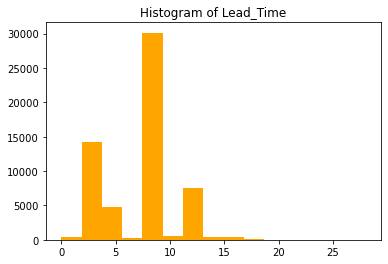

<Figure size 1440x1080 with 0 Axes>

In [8]:
# 几乎都在0-20范围，主要集中在3，8，12时段
plt.hist(x = df["lead_time"] , bins = 15,color = "orange")
plt.title('Histogram of Lead_Time')
plt.figure(figsize=(20,15))
plt.show()

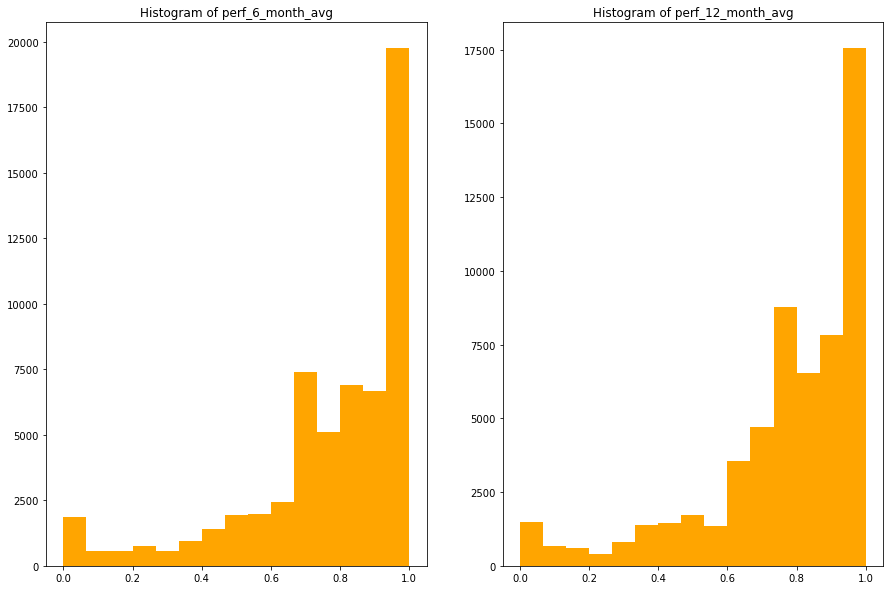

In [9]:
# 分布很相似，都有明显的长尾效应，集中在0.7-1.0区间
plt.figure(figsize = [15, 10])

plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
plt.hist(x = df["perf_6_month_avg"], bins = 15 , color = "orange")
plt.title('Histogram of perf_6_month_avg')

plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
plt.hist(x = df["perf_12_month_avg"], bins = 15 , color = "orange")
plt.title('Histogram of perf_12_month_avg')

plt.show()

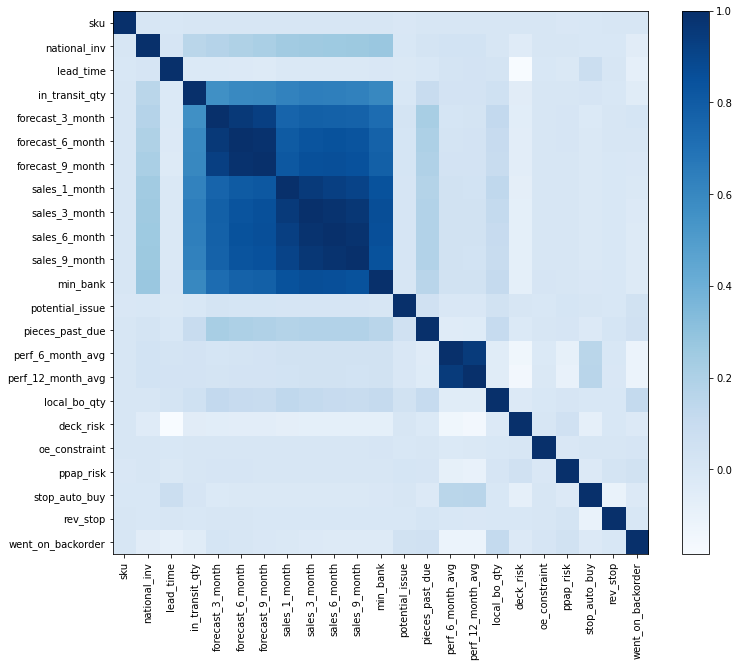

In [10]:
fig = plt.figure(figsize=(12,10)) 

# 相关矩阵
plt.imshow(df.corr(), cmap=plt.cm.Blues, interpolation='nearest', aspect='auto', alpha = 1)
plt.colorbar()

# 标记特征和颜色
tick_marks = [i for i in range(len(df.columns))]
plt.xticks(tick_marks, df.columns, rotation='vertical')
plt.yticks(tick_marks, df.columns)

plt.show()

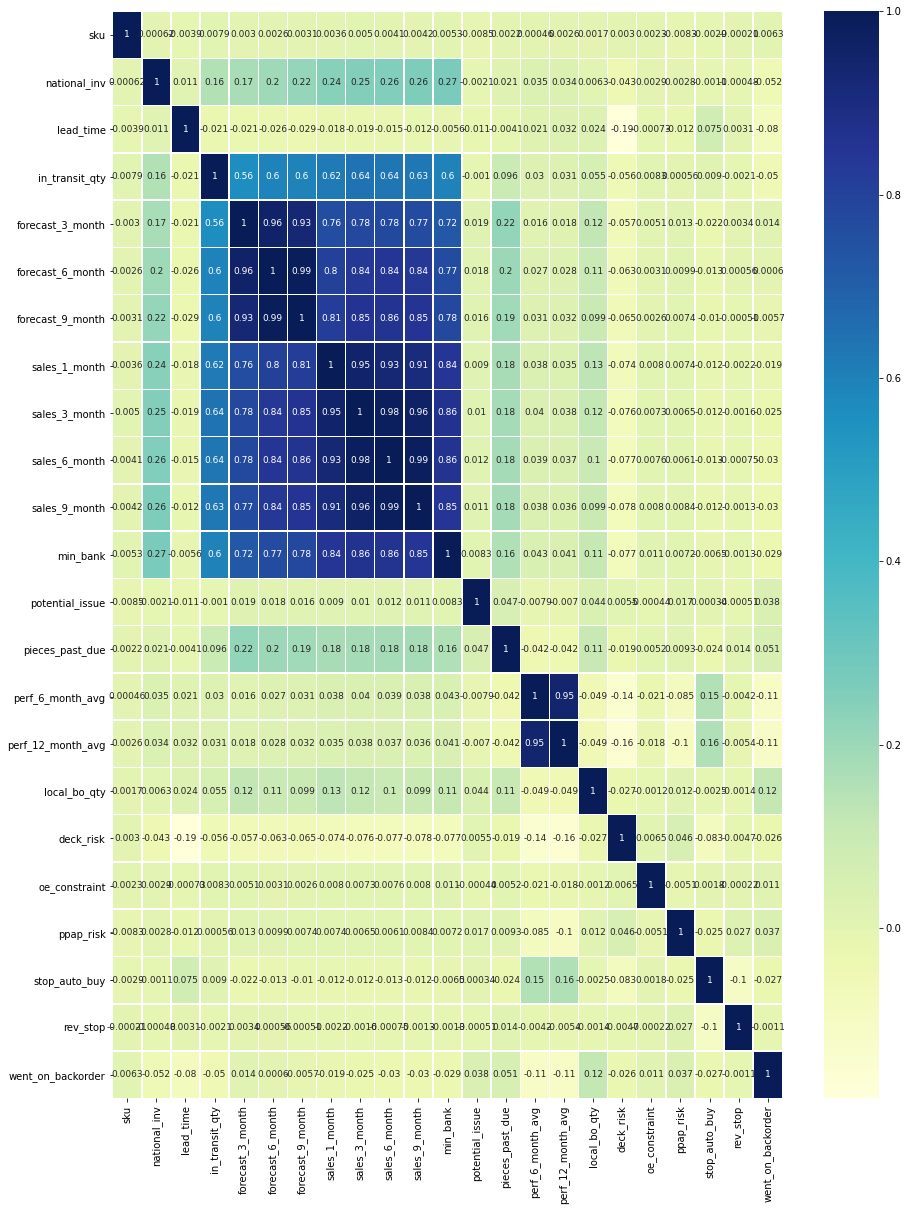

In [11]:
# 相关矩阵表明，运输中的数量、3、6、9个月的预测销量
# 、前1、3、6、9个月的实际销量和最低推荐库存水平
# 共计九个变量之间存在高度相关性。
# 特别的有，过去的1、3、6、9个月的销售额很高，
# 那么在接下来的3/6/9个月的销售额也会很高是合理的。如果预测销售额很高，那么持有更多的库存并发货将是有用的。
# 过去6个月的平均表现与过去12个月的表现呈高度正相关。
plt.subplots(figsize = (15 , 20))

# 热力图
sns.heatmap(df.corr(), annot=True,cmap="YlGnBu" ,linewidths = 0.5, annot_kws={"size": 9})

plt.show()

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


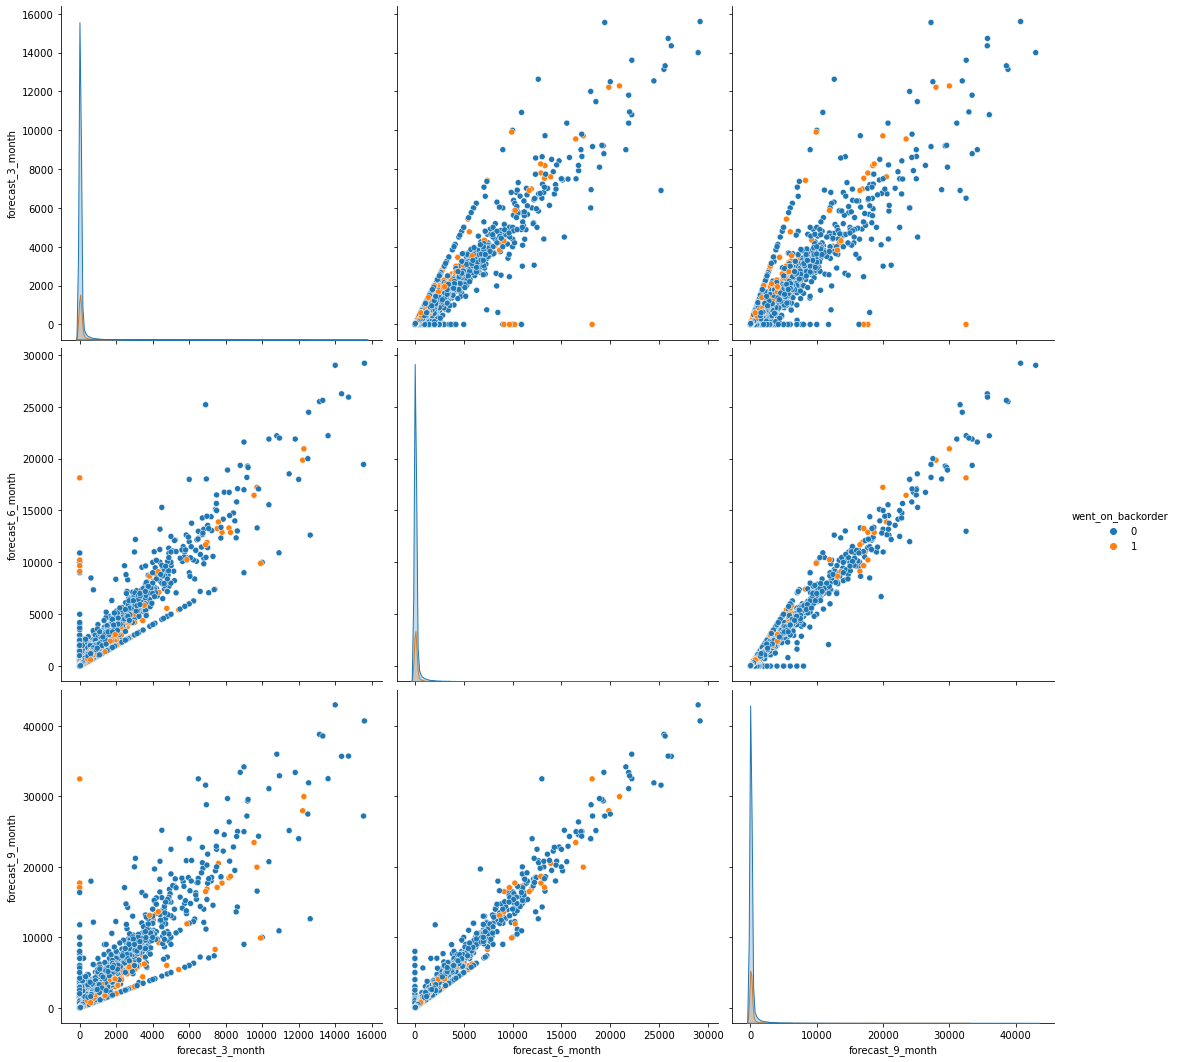

<Figure size 1440x864 with 0 Axes>

In [12]:
# 线性相关性还可以，部分有些偏离，但是没有发现标签的分布特征
# 预料中应该是延迟订单会在预测值低或高的区间集中分布
forecasts = ['forecast_3_month','forecast_6_month', 'forecast_9_month']
sns.pairplot(df, vars=forecasts, hue='went_on_backorder', size=5)
fig = plt.figure(figsize = (20 , 12))
plt.show()

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


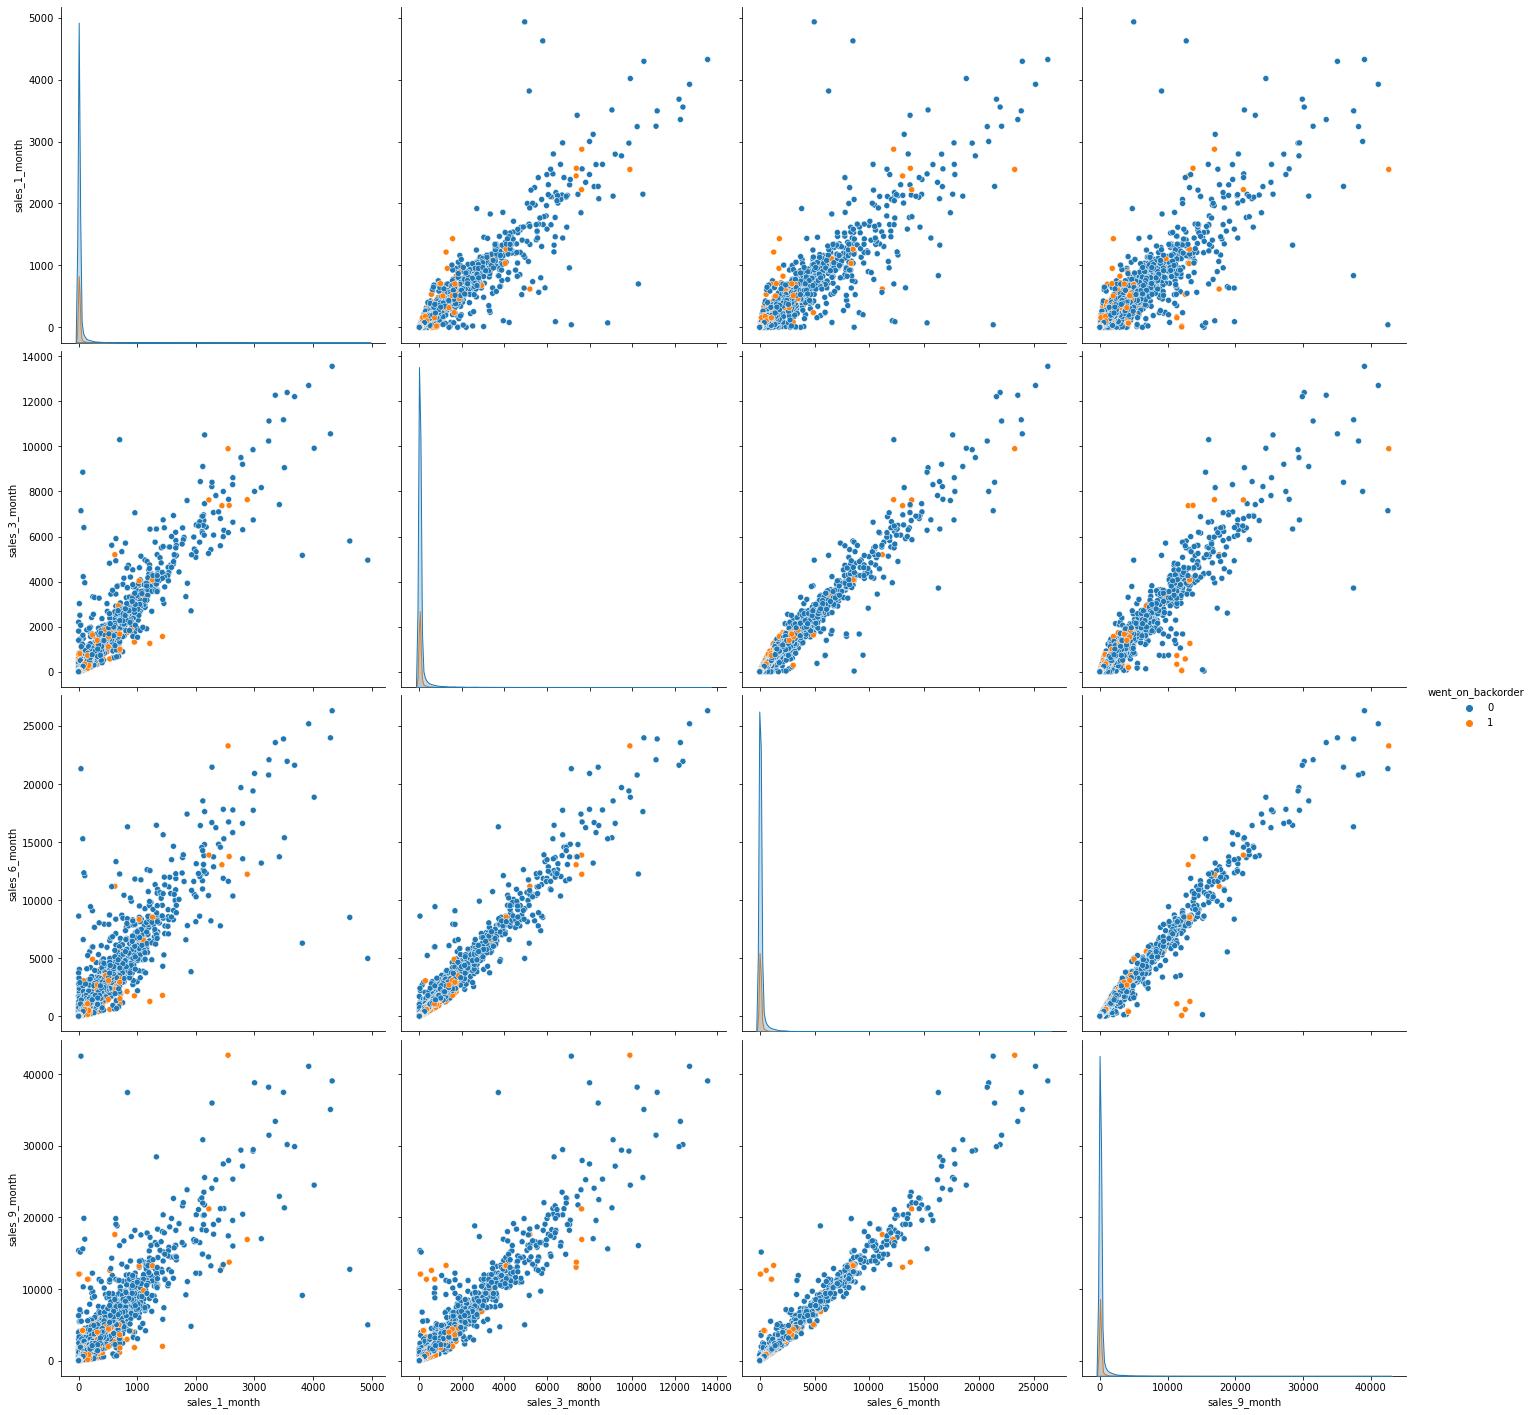

<Figure size 1440x864 with 0 Axes>

In [13]:
#同理看一下历史销量
sales = ['sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month']
sns.pairplot(df, vars=sales, hue='went_on_backorder', size=5)
fig = plt.figure(figsize = (20 , 12))
plt.show()

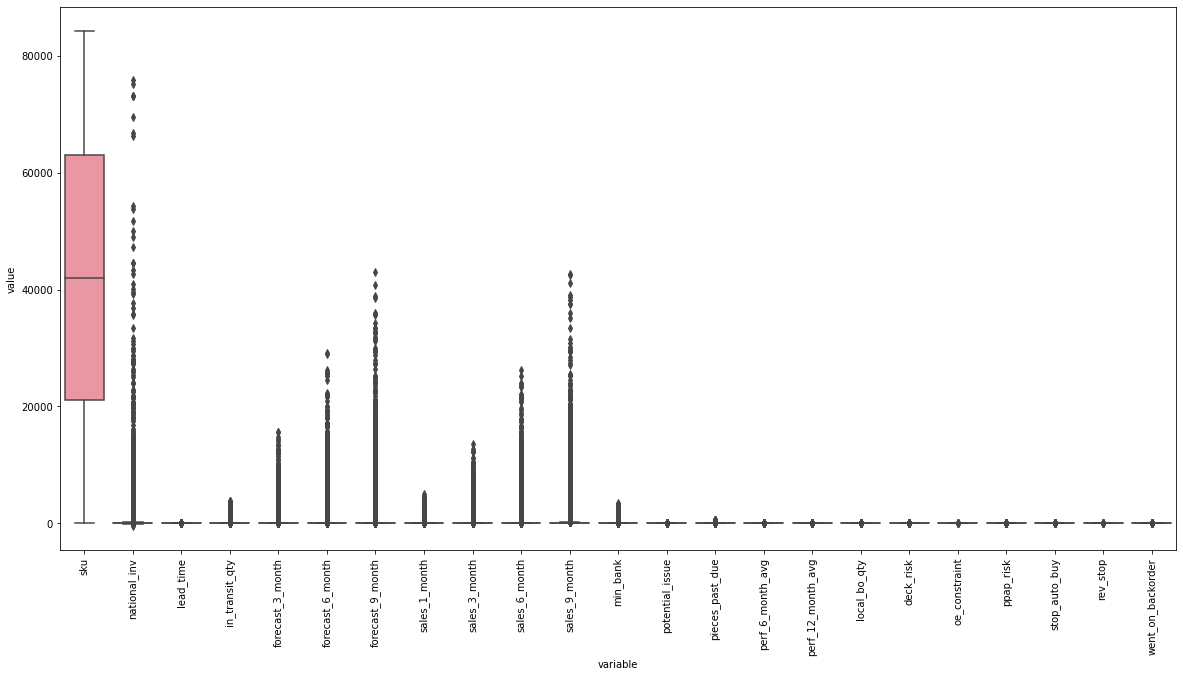

In [14]:
fig = plt.figure(figsize = (20 , 10))
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.xticks(rotation = 90)
plt.show()

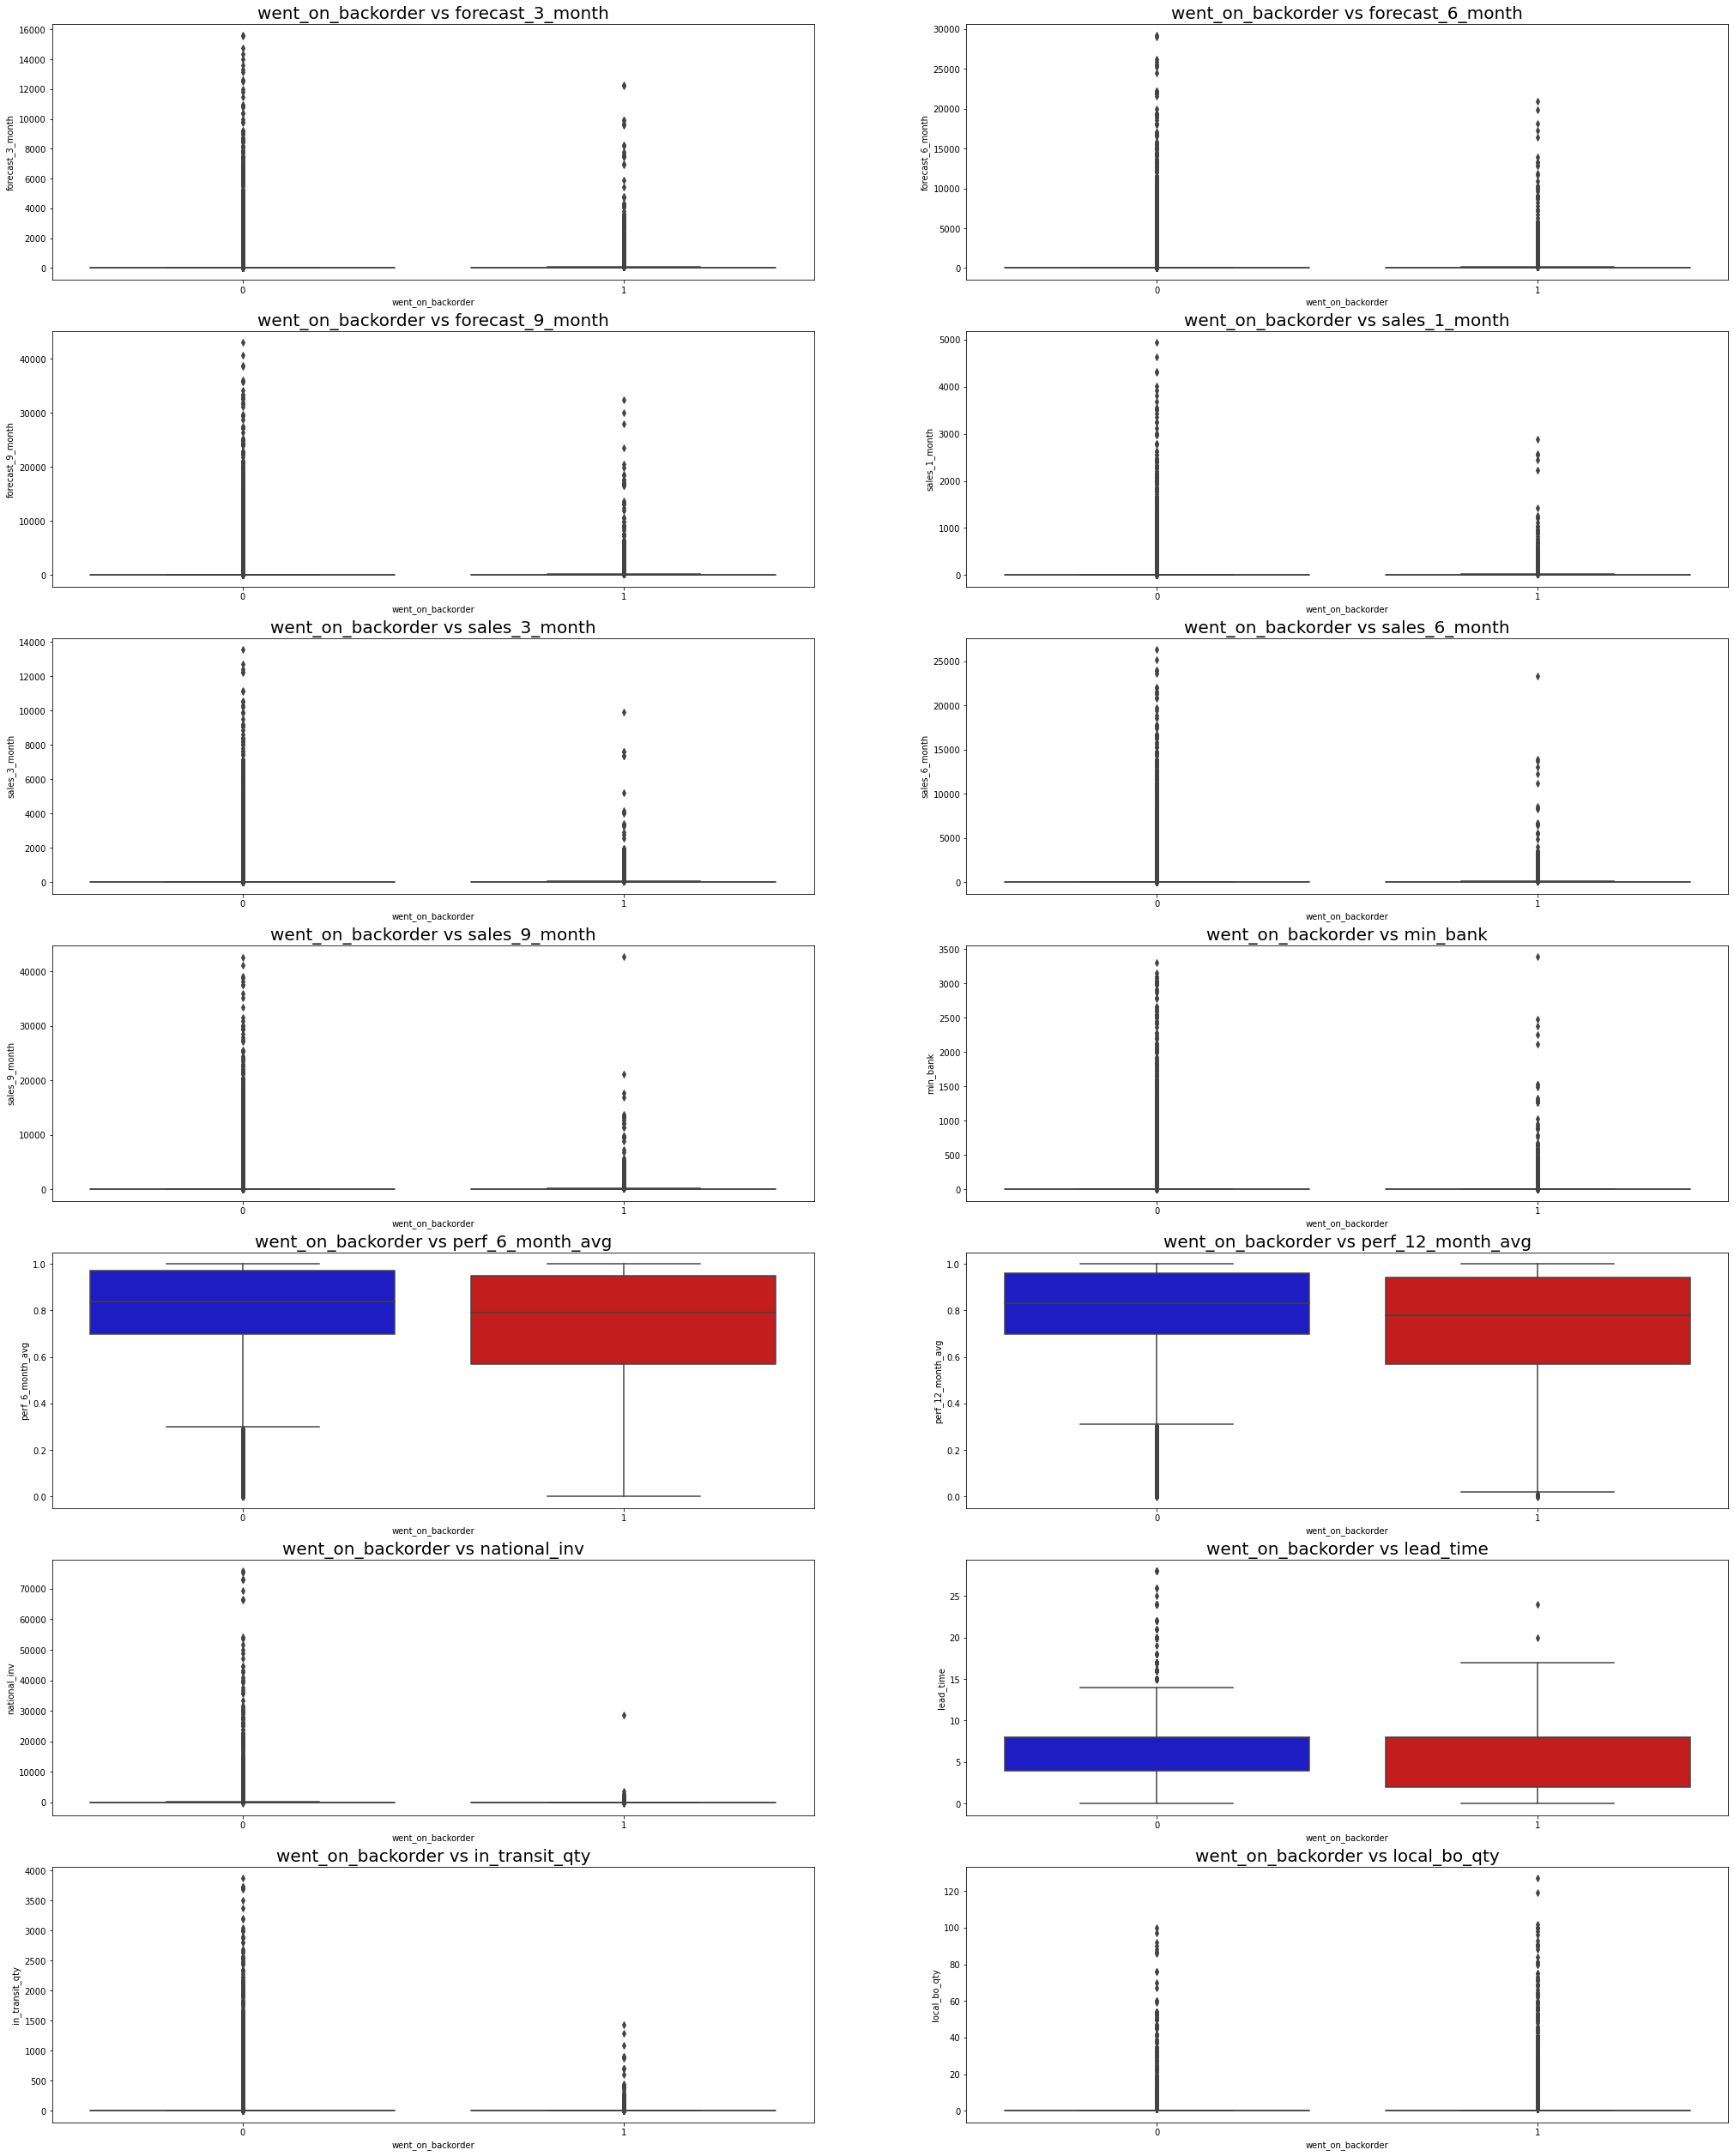

In [15]:
## Allocating the axis and the subplots 
colors = ["#0101DF", "#DF0101"]
f, axes = plt.subplots(7,2, figsize=(35,45))

## Creating the Boxplot for Every Feature with respect to "Went on Backorder"

sns.boxplot(x="went_on_backorder", y="forecast_3_month", data=df, palette=colors, ax=axes[0,0])
axes[0,0].set_title('went_on_backorder vs forecast_3_month' , fontsize= 20)
axes[0,0].set_xlabel('went_on_backorder',fontsize = 10) 
axes[0,0].set_ylabel('forecast_3_month', fontsize = 10)

sns.boxplot(x="went_on_backorder", y="forecast_6_month", data=df, palette=colors, ax=axes[0,1])
axes[0,1].set_title('went_on_backorder vs forecast_6_month',fontsize= 20)
axes[0,1].set_xlabel('went_on_backorder',fontsize = 10) 
axes[0,1].set_ylabel('forecast_6_month', fontsize = 10)

sns.boxplot(x="went_on_backorder", y="forecast_9_month", data=df, palette=colors, ax=axes[1,0])
axes[1,0].set_title('went_on_backorder vs forecast_9_month',fontsize= 20)
axes[1,0].set_xlabel('went_on_backorder',fontsize = 10) 
axes[1,0].set_ylabel('forecast_9_month', fontsize = 10)

sns.boxplot(x="went_on_backorder", y="sales_1_month", data=df, palette=colors, ax=axes[1,1])
axes[1,1].set_title('went_on_backorder vs sales_1_month',fontsize= 20)
axes[1,1].set_xlabel('went_on_backorder',fontsize = 10) 
axes[1,1].set_ylabel('sales_1_month', fontsize = 10)

sns.boxplot(x="went_on_backorder", y="sales_3_month", data=df, palette=colors, ax=axes[2,0])
axes[2,0].set_title('went_on_backorder vs sales_3_month',fontsize= 20)
axes[2,0].set_xlabel('went_on_backorder',fontsize = 10) 
axes[2,0].set_ylabel('sales_3_month', fontsize = 10)

sns.boxplot(x="went_on_backorder", y="sales_6_month", data=df, palette=colors, ax=axes[2,1])
axes[2,1].set_title('went_on_backorder vs sales_6_month',fontsize= 20)
axes[2,1].set_xlabel('went_on_backorder',fontsize = 10) 
axes[2,1].set_ylabel('sales_6_month', fontsize = 10)

sns.boxplot(x="went_on_backorder", y="sales_9_month", data=df, palette=colors, ax=axes[3,0])
axes[3,0].set_title('went_on_backorder vs sales_9_month',fontsize= 20)
axes[3,0].set_xlabel('went_on_backorder',fontsize = 10) 
axes[3,0].set_ylabel('sales_9_month', fontsize = 10)

sns.boxplot(x="went_on_backorder", y="min_bank", data=df, palette=colors, ax=axes[3,1])
axes[3,1].set_title('went_on_backorder vs min_bank',fontsize= 20)
axes[3,1].set_xlabel('went_on_backorder',fontsize = 10) 
axes[3,1].set_ylabel('min_bank', fontsize = 10)

sns.boxplot(x="went_on_backorder", y="perf_6_month_avg", data=df, palette=colors, ax=axes[4,0])
axes[4,0].set_title('went_on_backorder vs perf_6_month_avg',fontsize= 20)
axes[4,0].set_xlabel('went_on_backorder',fontsize = 10) 
axes[4,0].set_ylabel('perf_6_month_avg', fontsize = 10)

sns.boxplot(x="went_on_backorder", y="perf_12_month_avg", data=df, palette=colors, ax=axes[4,1])
axes[4,1].set_title('went_on_backorder vs perf_12_month_avg',fontsize= 20)
axes[4,1].set_xlabel('went_on_backorder',fontsize = 10) 
axes[4,1].set_ylabel('perf_12_month_avg', fontsize = 10)

sns.boxplot(x="went_on_backorder", y="national_inv", data=df, palette=colors, ax=axes[5,0])
axes[5,0].set_title('went_on_backorder vs national_inv',fontsize= 20)
axes[5,0].set_xlabel('went_on_backorder',fontsize = 10) 
axes[5,0].set_ylabel('national_inv', fontsize = 10)

sns.boxplot(x="went_on_backorder", y="lead_time", data=df, palette=colors, ax=axes[5,1])
axes[5,1].set_title('went_on_backorder vs lead_time',fontsize= 20)
axes[5,1].set_xlabel('went_on_backorder',fontsize = 10) 
axes[5,1].set_ylabel('lead_time', fontsize = 10)

sns.boxplot(x="went_on_backorder", y="in_transit_qty", data=df, palette=colors, ax=axes[6,0])
axes[6,0].set_title('went_on_backorder vs in_transit_qty',fontsize= 20)
axes[6,0].set_xlabel('went_on_backorder',fontsize = 10) 
axes[6,0].set_ylabel('in_transit_qty', fontsize = 10)

sns.boxplot(x="went_on_backorder", y="local_bo_qty", data=df, palette=colors, ax=axes[6,1])
axes[6,1].set_title('went_on_backorder vs local_bo_qty',fontsize= 20)
axes[6,1].set_xlabel('went_on_backorder',fontsize = 10) 
axes[6,1].set_ylabel('local_bo_qty', fontsize = 10)

## PLotting 
plt.show()

In [16]:
df.skew()

sku                   0.004193
national_inv         26.218761
lead_time            -0.016861
in_transit_qty       15.376587
forecast_3_month     13.554719
forecast_6_month     13.435192
forecast_9_month     13.540964
sales_1_month        13.880489
sales_3_month        12.666195
sales_6_month        12.829744
sales_9_month        13.338128
min_bank             12.015635
potential_issue      31.031199
pieces_past_due      25.479296
perf_6_month_avg     -1.504102
perf_12_month_avg    -1.527268
local_bo_qty         18.944509
deck_risk             1.661924
oe_constraint        73.167927
ppap_risk             2.325333
stop_auto_buy        -7.292987
rev_stop             62.650885
went_on_backorder     1.877837
dtype: float64

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

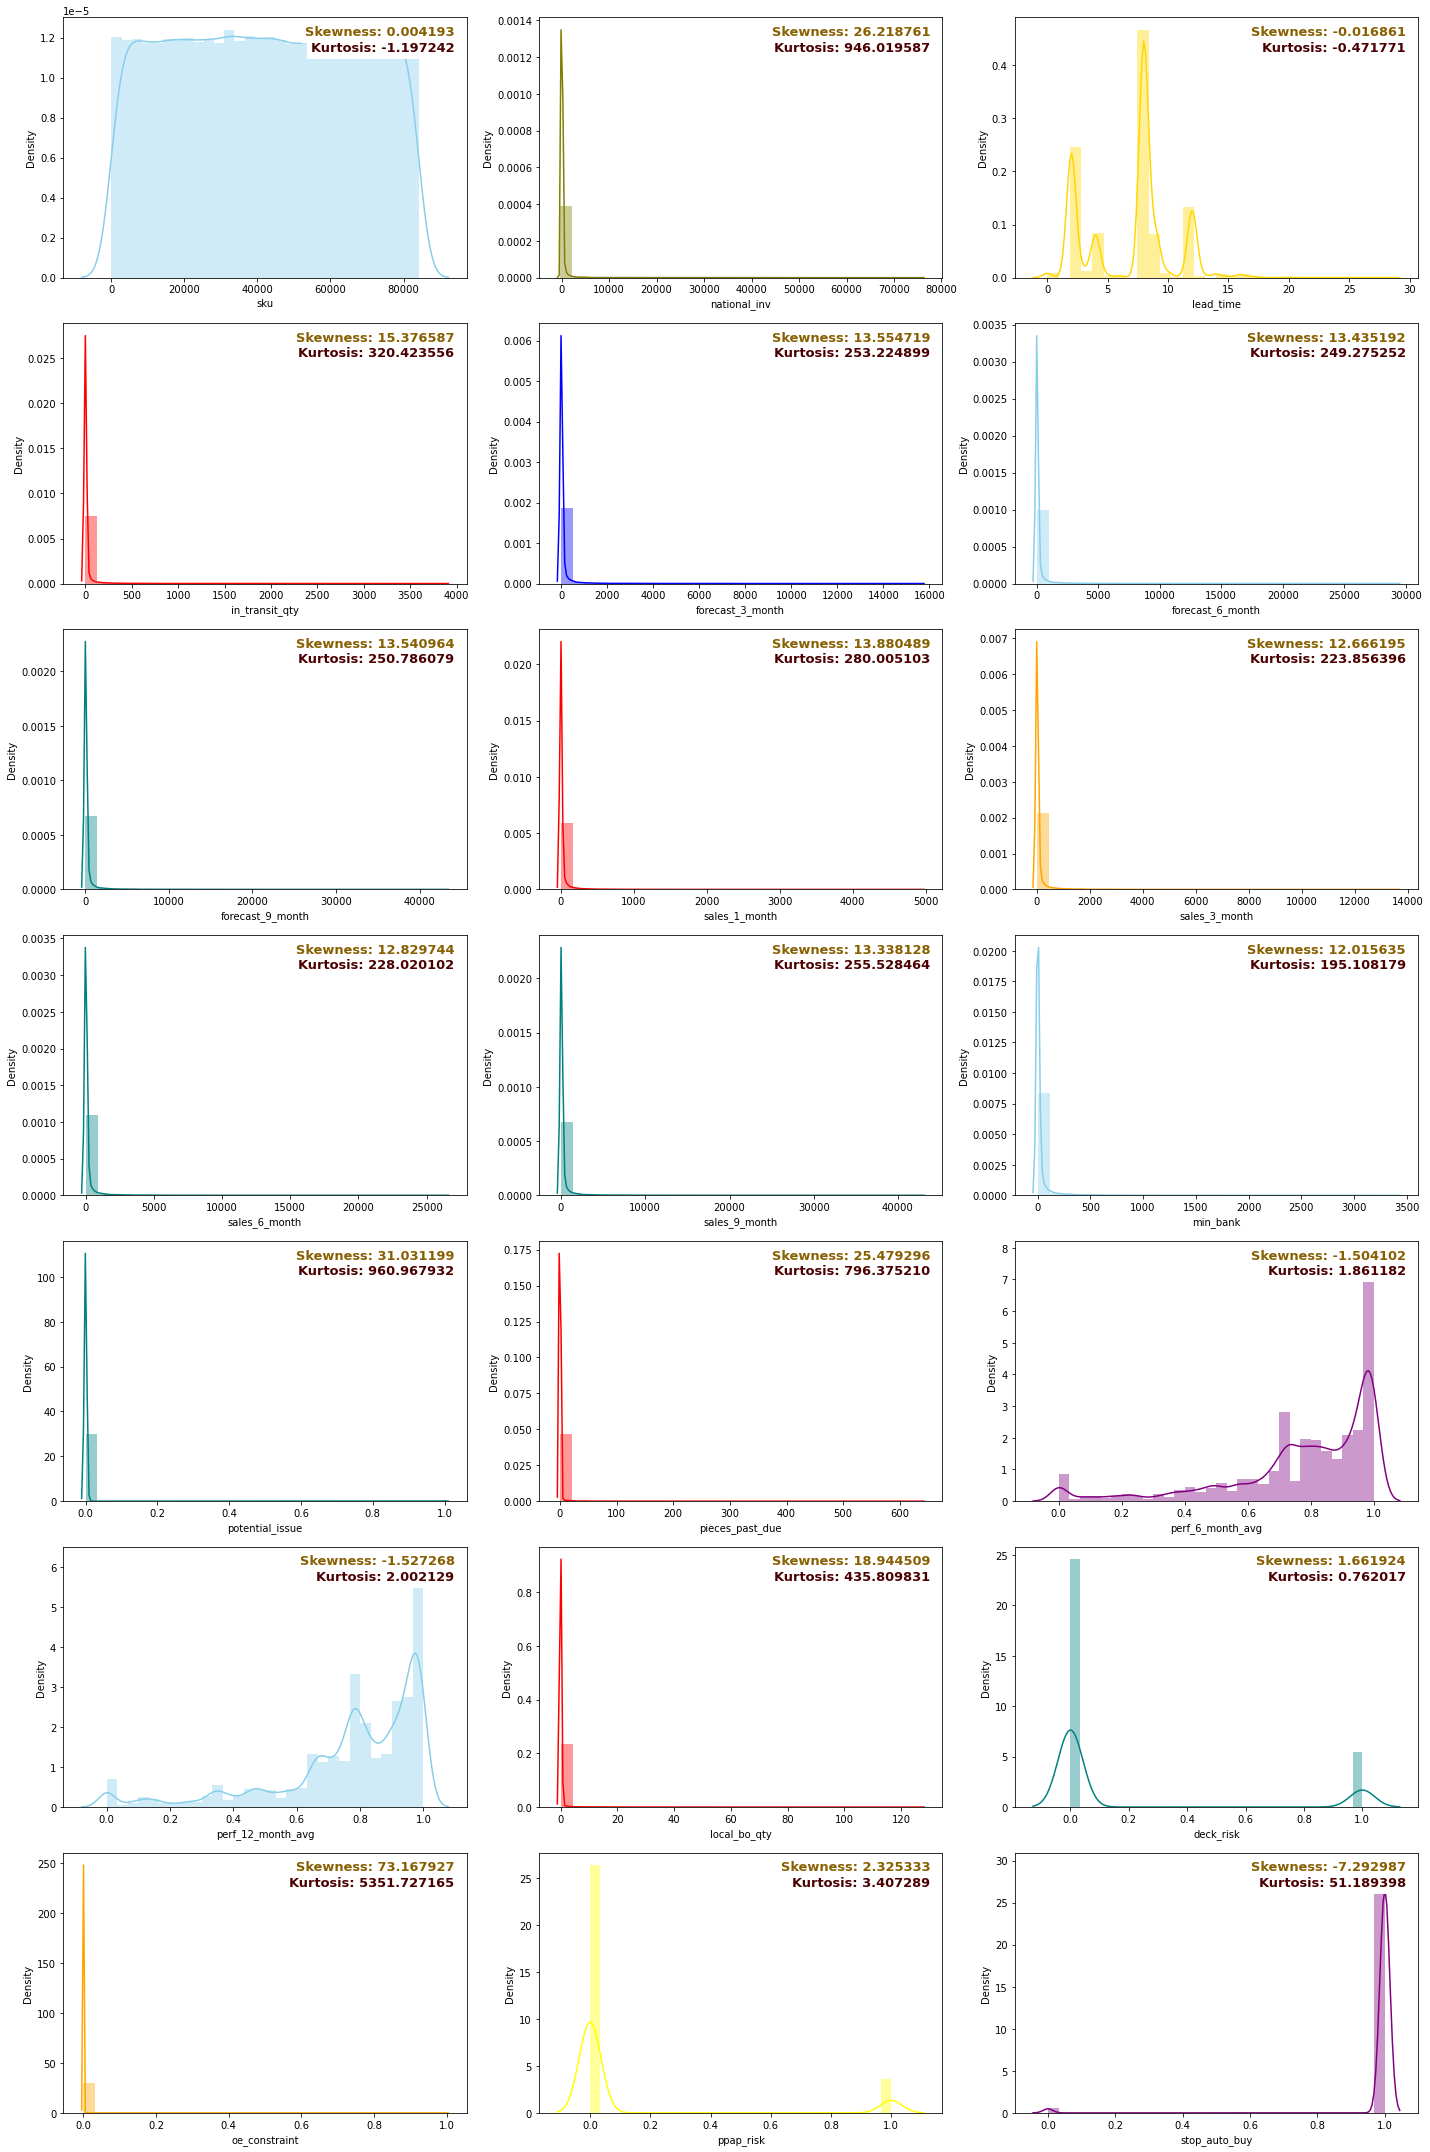

In [17]:
## Allocating the axis
f, axes = plt.subplots(7, 3, figsize=(20, 30))

## Univariate analysis using distplot
sns.distplot(df.iloc[:,0], color="skyblue",bins = 30, ax=axes[0,0])
sns.distplot(df.iloc[:,1], color="olive",bins = 30, ax=axes[0,1])
sns.distplot(df.iloc[:,2], color="gold",bins = 30, ax=axes[0,2])
sns.distplot(df.iloc[:,3], color="red",bins = 30, ax=axes[1,0])
sns.distplot(df.iloc[:,4], color="blue",bins = 30, ax=axes[1,1])
sns.distplot(df.iloc[:,5], color="skyblue",bins = 30, ax=axes[1,2])
sns.distplot(df.iloc[:,6], color="teal",bins = 30, ax=axes[2,0])
sns.distplot(df.iloc[:,7], color="red",bins = 30, ax=axes[2,1])
sns.distplot(df.iloc[:,8], color="orange",bins = 30, ax=axes[2,2])
sns.distplot(df.iloc[:,9], color="teal", bins = 30,ax=axes[3,0])
sns.distplot(df.iloc[:,10], color="teal", bins = 30,ax=axes[3,1])
sns.distplot(df.iloc[:,11], color="skyblue", bins = 30,ax=axes[3,2])
sns.distplot(df.iloc[:,12], color="teal", bins = 30,ax=axes[4,0])
sns.distplot(df.iloc[:,13], color="red", bins = 30,ax=axes[4,1])
sns.distplot(df.iloc[:,14], color="purple",bins = 30, ax=axes[4,2])
sns.distplot(df.iloc[:,15], color="skyblue",bins = 30, ax=axes[5,0])
sns.distplot(df.iloc[:,16], color="red",bins = 30, ax=axes[5,1])
sns.distplot(df.iloc[:,17], color="teal", bins = 30,ax=axes[5,2])
sns.distplot(df.iloc[:,18], color="orange",bins = 30, ax=axes[6,0])
sns.distplot(df.iloc[:,19], color="yellow", bins = 30,ax=axes[6,1])
sns.distplot(df.iloc[:,20], color="purple", bins = 30,ax=axes[6,2])

## calculating the Skewness and Kurtosis for the features 
for i, ax in enumerate(axes.reshape(-1)):
    ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % df.iloc[:,i].skew(),\
        fontweight='demibold', fontsize=13, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
    ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % df.iloc[:,i].kurt(),\
        fontweight='demibold', fontsize=13, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:dried blood') 
    
## Plotting    
plt.tight_layout()

The feature is : deck_risk
Cross Tab for deck_risk and went on back order
went_on_backorder          0          1
deck_risk                              
0                  68.655272  13.299615
1                  15.568832   2.476281
AxesSubplot(0.125,0.125;0.775x0.755)


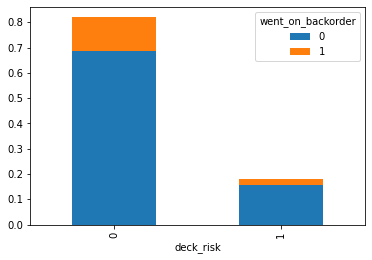

The feature is : oe_constraint
Cross Tab for oe_constraint and went on back order
went_on_backorder          0          1
oe_constraint                          
0                  84.213921  15.767409
1                   0.010183   0.008486
AxesSubplot(0.125,0.125;0.775x0.755)


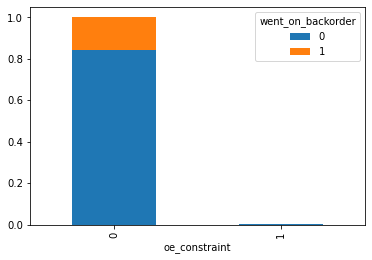

The feature is : ppap_risk
Cross Tab for ppap_risk and went on back order
went_on_backorder          0          1
ppap_risk                              
0                  74.483613  13.423514
1                   9.740491   2.352382
AxesSubplot(0.125,0.125;0.775x0.755)


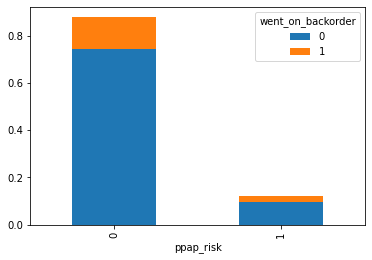

The feature is : stop_auto_buy
Cross Tab for stop_auto_buy and went on back order
went_on_backorder          0          1
stop_auto_buy                          
0                   1.371374   0.409036
1                  82.852730  15.366860
AxesSubplot(0.125,0.125;0.775x0.755)


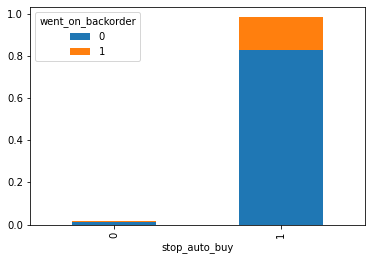

The feature is : rev_stop
Cross Tab for rev_stop and went on back order
went_on_backorder          0          1
rev_stop                               
0                  84.202040  15.772501
1                   0.022064   0.003394
AxesSubplot(0.125,0.125;0.775x0.755)


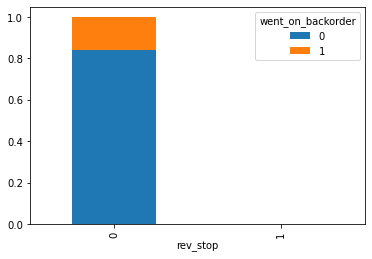

The feature is : went_on_backorder
Cross Tab for went_on_backorder and went on back order
went_on_backorder          0          1
went_on_backorder                      
0                  84.224104   0.000000
1                   0.000000  15.775896
AxesSubplot(0.125,0.125;0.775x0.755)


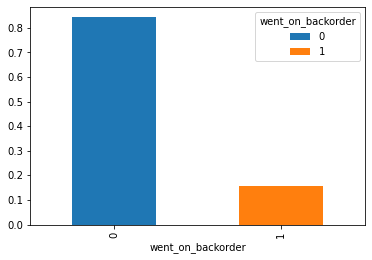

In [18]:
cat_col = df.loc[:,"deck_risk":"went_on_backorder"]
for i in cat_col:
    cross_tab = pd.crosstab(df[i], df['went_on_backorder'] , normalize = True)
    plotting = pd.crosstab(df[i], df['went_on_backorder'] , normalize = True ).plot.bar(stacked = True)
    print("The feature is :" , i)    
    print("Cross Tab for", i , "and went on back order")
    print(cross_tab*100)
    print(plotting)
    plt.show()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


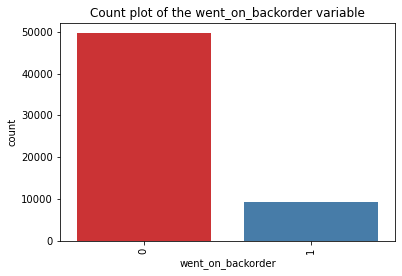

In [19]:
# 样本不均衡，进行处理
sns.countplot(df['went_on_backorder'], palette='Set1')
plt.title("Count plot of the went_on_backorder variable")
plt.xticks(rotation = 90)
plt.show()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

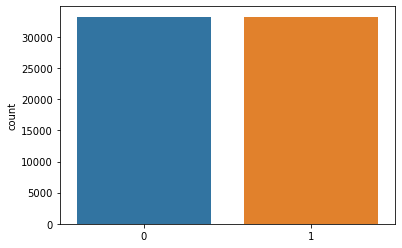

In [20]:
sku = df['sku'].values
df = df.drop(['sku'], axis=1)
x = df.drop(['went_on_backorder'], axis=1).values
y = df['went_on_backorder'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
sm = SMOTE(random_state=12)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)
sns.countplot(y_train_res)

In [21]:
# randomfrom sklearn.metrics import accuracy_score, f1_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,auc
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

In [22]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torch.autograd import Variable

In [24]:
xres = torch.FloatTensor(x)
yres = torch.FloatTensor(y)

x_train_res = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train_res = torch.LongTensor(y_train) ## LongTensor dosent converts it into floating point 
y_test = torch.LongTensor(y_test)

In [25]:
class Net(nn.Module):
    def __init__(self, in_count, output_count):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(in_count, 50)
        self.fc2 = nn.Linear(50, 25)
        self.fc3 = nn.Linear(25, output_count)
        self.softmax = nn.Softmax()
        
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.fc3(x)
        return self.softmax(x)

In [26]:
model = Net(x.shape[1], 2)

In [27]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [28]:
final_losses = []
for epochs in range(200):
    optimizer.zero_grad()
    out = model(x_train_res)
    loss = criterion(out, y_train_res)
    final_losses.append(loss)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epochs+1}, loss: {loss.item()}")

<ipython-input-25-ac03f86b6c80>:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.softmax(x)


Epoch 1, loss: 0.9370658993721008
Epoch 2, loss: 0.5312596559524536
Epoch 3, loss: 0.4933876395225525
Epoch 4, loss: 0.4802217185497284
Epoch 5, loss: 0.475043922662735
Epoch 6, loss: 0.47283366322517395
Epoch 7, loss: 0.4718332290649414
Epoch 8, loss: 0.4713616669178009
Epoch 9, loss: 0.4711315929889679
Epoch 10, loss: 0.4710146486759186
Epoch 11, loss: 0.47095516324043274
Epoch 12, loss: 0.47092437744140625
Epoch 13, loss: 0.47090935707092285
Epoch 14, loss: 0.4709024727344513
Epoch 15, loss: 0.4708995521068573
Epoch 16, loss: 0.47089797258377075
Epoch 17, loss: 0.4708968698978424
Epoch 18, loss: 0.47089552879333496
Epoch 19, loss: 0.47089317440986633
Epoch 20, loss: 0.4708898067474365
Epoch 21, loss: 0.4708852469921112
Epoch 22, loss: 0.47087907791137695
Epoch 23, loss: 0.4708709418773651
Epoch 24, loss: 0.47086066007614136
Epoch 25, loss: 0.4708474576473236
Epoch 26, loss: 0.4708300828933716
Epoch 27, loss: 0.47080641984939575
Epoch 28, loss: 0.4707737863063812
Epoch 29, loss: 0.47

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
pred = model(xres)
_, predict_classes = torch.max(pred,1)

correct = accuracy_score(yres, predict_classes)
print(f"Accurcay: {correct}")

Accurcay: 0.9159014918786809


<ipython-input-25-ac03f86b6c80>:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.softmax(x)


In [31]:
pred = model(x_test)
_, predict_classes = torch.max(pred,1)

correct = accuracy_score(y_test, predict_classes)
print(f"Accurcay: {correct}")

Accurcay: 0.9139066035795104


<ipython-input-25-ac03f86b6c80>:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.softmax(x)


Text(0.5, 0, 'epochs')

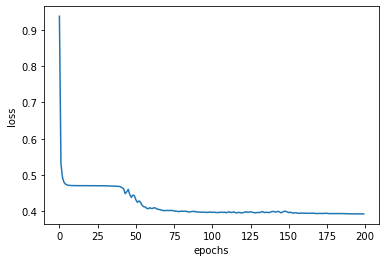

In [32]:
plt.plot(range(200), final_losses)
plt.ylabel('loss')
plt.xlabel('epochs')

In [33]:
predictions = []

with torch.no_grad():
    for i, data in enumerate(x_test):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())
        print(str(sku[i])+','+str(y_pred.argmax().item()))
#         print(y_pred.argmax().item())
# print(str(sum(predictions)))

<ipython-input-25-ac03f86b6c80>:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.softmax(x)


2,0
5,0
7,1
9,0
10,0
11,0
16,0
19,0
20,0
22,0
24,0
26,0
29,1
32,0
33,0
35,0
37,0
38,0
39,0
41,0
43,0
44,0
45,0
47,0
48,0
49,0
50,0
53,0
54,0
58,0
59,0
60,0
61,0
62,1
63,0
64,0
65,0
66,1
67,0
68,0
69,0
70,0
71,0
72,1
73,0
74,0
75,0
76,0
77,0
80,0
81,1
82,0
83,0
85,0
86,0
87,0
89,0
90,0
91,0
93,0
95,1
97,1
98,0
99,0
103,0
105,0
106,1
107,0
108,1
109,0
110,0
113,1
114,0
115,0
116,0
117,0
118,0
120,0
121,0
123,0
124,0
128,1
129,0
130,1
131,0
132,0
133,0
135,0
136,1
137,0
138,1
139,1
140,0
141,0
143,0
144,0
145,1
146,0
147,0
148,1
150,0
152,0
155,0
156,0
157,0
160,0
161,0
162,0
163,0
164,0
167,1
168,0
169,0
170,0
172,0
173,0
174,0
181,0
182,0
183,0
186,0
187,0
188,1
189,0
191,0
193,0
194,0
195,0
197,0
199,0
201,0
203,1
205,0
207,0
208,1
210,0
211,1
212,1
214,0
215,0
217,0
218,0
221,0
222,0
223,0
224,0
225,0
226,0
228,0
230,1
234,0
235,0
237,0
238,0
239,0
240,0
241,0
243,0
244,0
246,1
247,0
248,0
249,0
250,0
252,0
253,0
256,0
257,0
258,0
259,0
261,1
262,0
263,0
264,0
266,0
267,0
271,0
272,1


2507,0
2513,1
2514,1
2517,0
2518,0
2520,0
2521,0
2523,0
2524,0
2525,0
2526,0
2527,0
2528,0
2531,0
2532,0
2533,0
2534,0
2535,0
2536,0
2538,0
2540,1
2541,0
2543,0
2544,0
2545,0
2546,0
2547,0
2549,0
2550,0
2551,0
2553,0
2554,0
2556,1
2557,1
2560,0
2561,0
2562,0
2563,0
2565,0
2566,0
2568,0
2569,0
2570,0
2571,0
2572,0
2574,0
2575,0
2577,0
2578,0
2580,0
2581,0
2582,0
2584,1
2585,1
2586,1
2587,1
2588,1
2590,0
2591,1
2592,0
2594,1
2595,0
2596,0
2599,0
2600,1
2602,0
2605,1
2606,1
2607,0
2609,1
2610,0
2612,0
2613,0
2614,0
2615,0
2616,0
2617,0
2618,0
2619,0
2620,0
2621,0
2622,0
2623,0
2624,0
2625,1
2627,0
2628,0
2630,1
2631,0
2633,0
2635,0
2636,0
2637,0
2638,0
2639,0
2640,0
2641,0
2642,1
2644,1
2645,0
2648,0
2649,0
2650,0
2651,0
2652,0
2653,0
2656,1
2657,1
2658,0
2659,0
2663,0
2665,0
2666,0
2667,0
2668,0
2670,0
2671,0
2672,0
2673,0
2675,0
2676,0
2678,0
2679,0
2680,1
2681,0
2683,0
2684,0
2685,0
2686,0
2687,0
2688,0
2689,0
2690,0
2691,0
2692,0
2693,1
2694,0
2695,0
2696,1
2698,0
2699,1
2702,0
2703,0

4903,0
4904,1
4906,0
4907,0
4908,0
4909,1
4910,0
4911,0
4913,0
4914,0
4916,1
4917,0
4918,0
4919,0
4920,0
4923,0
4924,0
4925,0
4926,1
4928,1
4929,1
4930,0
4931,0
4932,0
4933,0
4934,0
4935,0
4938,0
4939,0
4940,0
4941,0
4942,0
4943,0
4945,0
4947,0
4949,0
4950,0
4952,0
4953,0
4954,0
4956,0
4957,0
4959,0
4960,0
4962,0
4963,0
4964,0
4965,0
4967,1
4968,0
4969,1
4970,0
4972,0
4973,0
4974,0
4975,0
4976,1
4977,1
4978,0
4979,1
4980,0
4982,0
4984,0
4986,0
4987,1
4988,0
4989,0
4991,0
4992,0
4993,0
4995,0
4996,0
4998,0
4999,0
5000,0
5002,1
5003,0
5004,0
5005,0
5006,0
5007,0
5008,0
5009,0
5010,0
5011,0
5012,0
5013,0
5014,0
5015,0
5017,0
5018,0
5019,0
5020,0
5021,0
5022,0
5023,0
5024,1
5025,0
5026,1
5027,1
5028,0
5029,0
5032,1
5033,0
5035,0
5036,0
5037,1
5038,0
5039,0
5040,0
5041,0
5043,0
5044,0
5045,0
5046,0
5047,0
5048,0
5051,1
5052,0
5053,0
5054,0
5056,0
5057,0
5059,0
5061,0
5063,0
5064,0
5066,0
5068,0
5069,1
5070,0
5072,0
5073,0
5074,1
5076,0
5078,1
5079,0
5080,1
5081,0
5082,1
5084,1
5085,0
5086,0

7364,0
7367,0
7368,0
7370,0
7371,0
7374,0
7377,0
7378,0
7379,0
7381,0
7383,0
7384,0
7385,0
7386,0
7387,0
7388,0
7389,0
7390,0
7392,1
7394,0
7396,0
7397,0
7400,0
7403,0
7404,1
7405,1
7406,0
7407,0
7408,0
7409,0
7410,0
7412,0
7413,0
7414,0
7415,0
7417,1
7418,0
7419,0
7420,0
7423,0
7426,1
7427,0
7428,0
7429,0
7430,1
7432,0
7434,0
7436,0
7437,0
7438,1
7439,0
7440,0
7441,0
7442,0
7443,0
7444,0
7445,0
7446,0
7447,0
7448,0
7449,0
7451,0
7454,0
7455,0
7456,0
7457,0
7458,0
7461,1
7462,0
7463,0
7464,0
7465,0
7466,0
7467,0
7468,0
7470,0
7472,0
7474,0
7476,0
7477,0
7478,0
7479,0
7480,0
7481,0
7482,0
7483,0
7484,0
7485,0
7486,0
7487,1
7488,0
7490,0
7492,0
7493,0
7494,1
7495,1
7496,0
7497,0
7501,0
7502,0
7503,1
7505,1
7506,0
7508,0
7510,0
7511,0
7513,0
7514,0
7515,0
7516,1
7519,0
7520,0
7521,0
7523,0
7525,0
7526,0
7528,0
7529,0
7530,0
7531,0
7532,0
7533,0
7535,0
7539,0
7540,1
7542,0
7543,0
7544,0
7545,0
7547,0
7548,0
7549,0
7550,0
7552,0
7554,0
7556,0
7558,0
7559,0
7562,0
7563,0
7564,1
7565,0
7567,0

9088,0
9090,0
9091,0
9093,1
9094,0
9095,0
9096,0
9097,0
9099,0
9100,0
9102,1
9103,0
9105,0
9106,0
9107,0
9108,0
9109,0
9111,0
9112,0
9115,0
9116,0
9118,0
9119,0
9120,0
9121,0
9123,0
9124,0
9126,0
9128,0
9129,0
9131,0
9133,1
9134,0
9135,0
9136,0
9137,0
9140,0
9141,0
9142,0
9143,1
9144,0
9146,0
9147,0
9148,0
9149,1
9150,0
9156,0
9157,0
9162,0
9163,0
9164,0
9165,0
9168,0
9170,0
9171,0
9173,0
9174,0
9176,0
9183,0
9185,0
9187,0
9189,0
9190,1
9191,0
9194,0
9195,0
9196,0
9197,0
9199,0
9201,0
9202,0
9203,0
9204,0
9205,1
9206,0
9207,0
9208,0
9209,0
9213,0
9215,0
9217,0
9219,0
9220,0
9221,0
9223,0
9224,0
9225,0
9226,0
9227,0
9228,0
9229,1
9230,1
9231,0
9232,1
9233,1
9234,1
9236,0
9237,0
9238,0
9239,1
9242,0
9243,0
9244,0
9245,0
9246,1
9250,0
9251,0
9252,0
9253,0
9254,0
9255,0
9256,0
9257,0
9258,0
9259,0
9260,0
9261,0
9262,0
9263,0
9264,0
9265,0
9266,1
9267,0
9268,0
9269,0
9271,0
9272,1
9274,1
9275,1
9276,0
9277,0
9280,0
9281,0
9282,0
9283,0
9284,1
9286,0
9287,0
9289,0
9293,0
9297,0
9298,0
9300,0

10843,0
10844,1
10845,0
10846,0
10848,0
10849,0
10850,0
10852,0
10853,1
10854,0
10857,0
10858,0
10859,0
10862,0
10863,0
10864,0
10866,0
10867,0
10868,0
10869,0
10870,0
10871,0
10872,0
10876,1
10879,0
10881,0
10882,0
10883,1
10884,0
10886,0
10887,1
10888,0
10889,1
10890,1
10891,0
10892,0
10893,0
10895,1
10896,0
10897,0
10898,0
10899,0
10900,0
10901,0
10902,0
10903,0
10904,0
10905,0
10906,0
10907,1
10908,0
10909,0
10911,0
10913,0
10914,1
10915,0
10916,0
10918,0
10921,0
10922,0
10924,0
10928,0
10930,0
10931,0
10932,1
10933,0
10937,0
10939,0
10942,1
10943,1
10944,0
10945,0
10946,0
10947,0
10949,0
10950,1
10952,1
10953,0
10954,0
10955,0
10957,0
10958,1
10959,0
10960,0
10961,0
10962,1
10963,0
10965,0
10966,0
10968,0
10970,0
10971,0
10972,0
10975,0
10976,0
10978,0
10980,0
10981,0
10984,0
10985,0
10986,0
10987,0
10988,0
10989,1
10990,1
10992,0
10993,0
10994,0
10995,0
10999,0
11000,0
11003,0
11004,0
11007,0
11008,0
11009,0
11010,0
11011,0
11012,0
11013,0
11014,0
11015,0
11016,0
11017,0
11019,1


12624,0
12627,0
12629,0
12630,1
12633,0
12635,0
12636,1
12637,0
12638,0
12639,0
12641,0
12643,0
12644,0
12650,0
12651,0
12654,0
12655,0
12658,1
12660,0
12661,0
12662,0
12663,0
12668,0
12669,0
12671,0
12672,0
12673,0
12677,0
12678,0
12679,0
12685,0
12687,0
12688,0
12689,0
12690,0
12691,0
12692,0
12694,1
12695,0
12697,0
12698,0
12700,0
12701,0
12702,0
12703,0
12704,0
12705,1
12706,0
12707,0
12708,0
12710,0
12713,0
12714,0
12716,0
12719,0
12721,0
12723,0
12724,0
12725,0
12726,0
12727,0
12728,0
12729,0
12730,1
12731,0
12732,1
12733,0
12734,0
12735,0
12737,1
12738,1
12739,0
12740,0
12741,0
12742,0
12743,0
12744,0
12745,0
12746,0
12747,0
12748,0
12749,0
12750,0
12751,0
12752,0
12753,0
12754,0
12755,0
12756,0
12757,0
12758,0
12759,0
12762,0
12764,0
12765,0
12766,0
12767,0
12769,0
12770,0
12772,0
12773,0
12776,1
12779,0
12782,0
12783,0
12784,0
12785,0
12787,0
12788,0
12789,0
12791,1
12792,0
12793,0
12794,1
12796,0
12797,0
12798,0
12799,0
12800,0
12801,1
12802,0
12805,0
12806,0
12807,0
12809,0


14317,0
14318,0
14319,0
14320,0
14322,0
14323,0
14324,1
14325,0
14326,0
14327,0
14328,0
14329,0
14332,1
14334,0
14336,0
14337,1
14338,0
14339,0
14340,0
14342,0
14343,0
14344,0
14346,0
14347,0
14348,1
14349,0
14350,0
14353,0
14354,0
14356,1
14358,0
14360,1
14365,0
14366,0
14367,0
14368,0
14369,1
14370,0
14371,0
14372,0
14374,0
14375,1
14377,0
14378,0
14379,0
14380,0
14383,0
14384,0
14386,0
14387,1
14390,0
14391,1
14396,1
14397,0
14398,0
14400,0
14402,0
14403,0
14404,0
14405,0
14406,0
14407,1
14409,0
14412,0
14414,0
14415,0
14417,0
14419,0
14421,0
14422,0
14423,0
14424,0
14425,0
14426,1
14429,1
14431,0
14432,0
14433,0
14434,0
14435,0
14436,0
14437,1
14440,0
14442,0
14443,0
14444,1
14447,0
14448,1
14449,0
14451,1
14452,0
14455,1
14458,0
14459,0
14460,0
14461,0
14463,1
14464,0
14465,0
14469,0
14470,0
14471,0
14473,1
14474,0
14475,0
14476,0
14477,0
14478,0
14479,0
14480,0
14482,0
14483,0
14484,0
14485,0
14487,1
14488,0
14491,1
14492,0
14493,0
14496,0
14497,0
14501,0
14505,0
14507,0
14508,0


15984,1
15986,0
15987,0
15989,0
15991,1
15992,0
15995,0
15996,0
15997,0
16000,0
16001,0
16002,1
16003,0
16004,0
16006,0
16007,0
16008,0
16011,0
16014,1
16016,1
16017,0
16018,0
16020,0
16021,0
16023,0
16024,0
16025,0
16027,0
16029,0
16030,0
16032,0
16034,0
16035,0
16036,0
16037,0
16039,0
16040,0
16041,1
16042,0
16043,0
16045,0
16047,0
16048,0
16049,0
16051,0
16052,0
16054,0
16055,0
16058,0
16059,1
16060,0
16061,0
16063,1
16066,0
16067,0
16068,0
16070,0
16071,0
16072,0
16073,0
16074,0
16075,0
16076,0
16077,0
16079,1
16080,0
16081,0
16082,0
16083,0
16085,0
16086,0
16087,0
16088,0
16089,0
16090,0
16092,1
16093,0
16097,0
16098,0
16099,0
16101,0
16102,0
16103,0
16104,0
16106,0
16107,1
16108,0
16109,0
16110,0
16111,0
16113,0
16114,0
16117,1
16118,0
16119,0
16121,0
16122,0
16124,0
16125,0
16126,0
16127,0
16128,0
16131,1
16132,0
16134,0
16137,0
16142,0
16143,0
16144,0
16146,0
16147,0
16149,1
16151,0
16153,0
16155,1
16156,0
16157,0
16160,0
16161,0
16162,0
16163,0
16164,0
16165,0
16166,0
16168,0


17599,0
17601,0
17603,0
17604,0
17605,0
17606,0
17608,0
17609,0
17610,0
17612,0
17613,0
17614,0
17615,1
17616,0
17618,0
17621,0
17622,0
17623,0
17625,0
17626,0
17628,0
17629,0
17630,0
17631,0
17632,1
17633,0
17634,0
17636,0
17638,0
17641,1
17642,0
17646,0
17647,0
17648,0
17650,0
17651,0
17652,0
17654,0
17655,0
17656,0
17657,0
17659,0
17662,0
17663,0
17664,0
17666,0
17667,0
17668,1
17669,0
17670,0
17672,0
17673,1
17674,0
17675,0
17678,0
17681,0
17683,1
17685,0
17687,0
17689,0
17690,0
17692,0
17693,0
17694,1
17695,0
17697,0
17698,0
17699,0
17700,0
17702,0
17703,0
17704,1
17705,0
17706,0
17708,1
17710,0
17713,0
17714,0
17715,0
17717,0
17718,1
17719,0
17721,0
17722,0
17723,0
17724,0
17725,0
17727,0
17728,0
17729,0
17731,0
17732,0
17734,1
17735,0
17736,0
17737,0
17738,0
17739,1
17740,0
17741,1
17745,0
17746,0
17747,0
17750,0
17751,0
17753,0
17757,1
17758,1
17759,0
17760,0
17762,0
17763,1
17765,0
17767,0
17770,0
17771,0
17773,0
17774,0
17775,0
17778,0
17781,1
17782,0
17783,0
17784,0
17787,0


19320,0
19321,0
19326,1
19327,1
19328,0
19329,0
19330,0
19332,0
19333,0
19335,0
19337,0
19339,0
19340,0
19341,0
19343,0
19344,1
19345,0
19346,0
19347,0
19348,0
19349,0
19350,0
19351,0
19352,0
19353,0
19354,0
19355,0
19356,0
19357,0
19358,0
19359,0
19360,0
19361,0
19363,0
19364,0
19365,1
19366,0
19367,0
19369,0
19370,0
19371,0
19372,0
19373,0
19374,0
19375,0
19377,0
19378,0
19380,0
19381,0
19382,0
19384,0
19385,0
19386,0
19387,0
19388,1
19389,0
19390,0
19392,0
19393,0
19394,0
19395,0
19396,1
19397,1
19398,0
19399,0
19400,0
19402,0
19404,0
19405,0
19406,0
19407,0
19408,0
19409,0
19410,1
19416,0
19417,0
19418,0
19419,0
19420,1
19424,0
19425,0
19427,0
19428,0
19430,0
19431,0
19435,0
19437,0
19438,0
19440,0
19441,0
19446,0
19447,0
19448,0
19449,1
19450,0
19451,0
19452,0
19454,0
19455,0
19456,0
19458,0
19459,0
19460,0
19462,0
19463,0
19464,0
19465,0
19466,0
19467,0
19468,0
19469,0
19470,0
19471,0
19472,1
19475,0
19476,0
19477,0
19478,0
19479,0
19480,0
19481,0
19482,0
19485,0
19486,0
19488,0


21029,0
21032,0
21033,1
21034,0
21036,0
21038,0
21041,0
21042,0
21043,1
21044,0
21045,0
21047,0
21048,0
21049,0
21051,1
21052,0
21054,0
21055,0
21057,0
21058,0
21059,0
21060,0
21061,0
21062,0
21064,1
21065,0
21067,0
21068,0
21069,0
21070,0
21072,0
21074,0
21077,0
21082,0
21083,0
21084,0
21085,0
21086,0
21087,0
21088,0
21089,0
21092,0
21093,0
21094,0
21095,0
21096,0
21097,0
21101,0
21103,0
21104,0
21105,0
21106,0
21107,0
21109,0
21110,0
21111,0
21112,0
21113,0
21114,0
21115,1
21116,1
21117,0
21118,0
21120,0
21121,0
21122,0
21123,0
21124,0
21125,1
21126,1
21127,0
21128,1
21130,0
21132,0
21133,0
21134,0
21135,1
21137,0
21138,0
21140,1
21142,1
21143,0
21145,0
21146,0
21151,0
21152,1
21154,0
21155,1
21156,0
21157,0
21158,0
21159,0
21160,0
21161,0
21162,0
21163,1
21164,0
21165,1
21167,0
21170,0
21171,0
21174,0
21176,0
21178,0
21179,0
21180,0
21182,0
21183,0
21184,0
21185,0
21186,0
21187,1
21188,1
21189,1
21190,0
21192,0
21194,0
21196,0
21197,0
21199,0
21203,1
21204,1
21205,0
21206,1
21207,0


22723,0
22724,0
22725,0
22726,1
22727,0
22729,0
22730,0
22732,0
22733,0
22734,0
22737,0
22739,0
22741,1
22743,0
22744,0
22746,0
22747,0
22749,0
22750,1
22751,1
22754,0
22755,0
22756,0
22757,0
22761,0
22763,0
22764,0
22765,0
22767,0
22768,0
22769,1
22772,0
22774,0
22776,1
22777,0
22778,0
22780,0
22784,0
22786,1
22787,0
22789,0
22790,1
22792,1
22795,0
22796,1
22797,0
22799,0
22800,0
22801,0
22802,0
22803,0
22804,0
22806,0
22807,0
22808,0
22809,0
22814,1
22817,0
22819,1
22820,0
22821,0
22822,0
22823,0
22824,0
22826,0
22829,0
22830,0
22832,0
22833,1
22834,0
22835,0
22836,0
22837,0
22838,0
22839,0
22840,0
22844,0
22845,0
22846,0
22847,0
22849,1
22850,0
22851,0
22852,1
22854,0
22855,0
22856,0
22858,0
22859,0
22860,0
22861,0
22864,0
22865,0
22872,0
22876,0
22878,1
22880,0
22881,0
22882,1
22883,0
22884,0
22885,0
22886,0
22890,1
22892,0
22893,1
22895,1
22896,1
22898,0
22899,0
22900,0
22901,0
22903,1
22904,0
22906,0
22908,0
22910,0
22912,0
22914,0
22915,0
22916,0
22918,1
22919,1
22920,0
22921,0


24493,0
24494,1
24496,0
24497,0
24498,0
24499,0
24500,0
24501,1
24502,0
24503,1
24506,0
24509,1
24510,0
24511,0
24513,0
24514,0
24515,0
24516,1
24517,0
24518,0
24519,0
24520,0
24521,0
24524,0
24526,0
24530,0
24531,0
24532,0
24533,0
24534,0
24538,1
24540,1
24542,0
24543,1
24545,0
24546,0
24550,0
24551,0
24552,0
24554,0
24555,1
24556,0
24557,1
24558,0
24560,0
24561,0
24563,0
24564,1
24566,0
24568,0
24569,0
24570,0
24571,0
24572,0
24573,0
24574,0
24575,0
24576,0
24578,0
24579,0
24580,0
24582,0
24583,0
24584,0
24585,0
24586,0
24587,0
24591,0
24593,0
24594,0
24595,0
24597,0
24598,0
24599,1
24600,0
24601,0
24602,0
24604,0
24606,1
24607,0
24609,0
24610,0
24611,0
24612,0
24614,0
24615,0
24616,0
24617,1
24618,0
24619,0
24620,0
24621,0
24622,0
24623,0
24625,1
24626,1
24628,1
24629,0
24630,0
24631,0
24632,0
24633,0
24635,0
24636,0
24637,0
24638,0
24639,1
24640,0
24641,0
24642,1
24643,0
24644,0
24645,0
24646,1
24648,0
24649,1
24652,0
24654,0
24655,0
24656,0
24657,0
24659,0
24660,0
24662,1
24663,0


26233,0
26234,0
26235,0
26236,0
26237,0
26238,0
26239,0
26240,0
26241,0
26242,0
26243,0
26244,1
26245,0
26248,0
26249,0
26250,0
26252,0
26253,0
26254,0
26255,0
26256,1
26257,0
26259,0
26260,0
26261,0
26265,0
26267,1
26270,0
26272,0
26273,0
26274,0
26275,1
26276,0
26277,1
26279,0
26280,0
26283,0
26284,1
26285,0
26286,1
26287,0
26288,0
26290,0
26291,0
26292,1
26293,1
26295,1
26296,0
26297,0
26298,0
26299,1
26300,0
26303,0
26304,0
26306,0
26307,0
26309,0
26310,0
26311,1
26312,0
26313,0
26316,0
26318,0
26319,1
26320,0
26321,1
26323,0
26325,0
26329,0
26330,0
26332,0
26333,0
26335,0
26336,0
26337,1
26339,0
26340,0
26341,0
26342,0
26343,0
26344,0
26345,0
26346,0
26348,1
26349,0
26350,0
26351,0
26353,0
26355,0
26356,0
26357,0
26360,0
26361,0
26362,0
26363,0
26364,0
26365,0
26366,0
26367,0
26370,0
26371,0
26372,1
26373,0
26375,0
26376,0
26377,0
26378,0
26380,0
26382,0
26384,0
26386,1
26387,0
26389,1
26390,0
26391,0
26394,0
26396,0
26397,1
26399,0
26400,0
26401,0
26402,0
26403,0
26404,0
26406,0


In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[15683,   695],
       [  979,  2087]], dtype=int64)

Text(33.0, 0.5, 'Predicted Values')

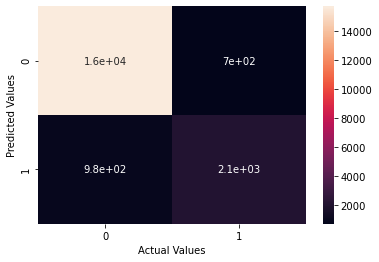

In [35]:
sns.heatmap(cm, annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [36]:
torch.save(model, 'back_orders.pt')

In [37]:
df_ = pd.read_csv('test.csv')

In [38]:
sku = df_['sku'].values
x = df_.drop(['sku'], axis=1).values
x = torch.FloatTensor(x)

In [39]:
predictions = []
# sku.iloc[i][0]
with torch.no_grad():
    for i, data in enumerate(x):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())
        print(str(sku[i])+','+str(y_pred.argmax().item()))
print(str(sum(predictions)))

<ipython-input-25-ac03f86b6c80>:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.softmax(x)


1,0
3,0
4,0
6,0
8,0
12,0
13,1
14,0
15,1
17,1
18,0
21,1
23,0
25,0
27,0
28,0
30,1
31,0
34,0
36,0
40,0
42,1
46,1
51,0
52,0
55,1
56,0
57,0
78,0
79,0
84,0
88,0
92,0
94,0
96,0
100,0
101,0
102,0
104,0
111,0
112,1
119,1
122,0
125,1
126,0
127,0
134,0
142,0
149,0
151,0
153,0
154,1
158,0
159,0
165,0
166,0
171,0
175,0
176,1
177,0
178,0
179,0
180,0
184,0
185,0
190,0
192,0
196,0
198,0
200,1
202,0
204,0
206,0
209,0
213,1
216,0
219,0
220,0
227,0
229,0
231,0
232,0
233,0
236,1
242,0
245,0
251,0
254,0
255,0
260,0
265,0
268,0
269,0
270,0
274,0
280,1
291,1
300,0
303,0
305,0
306,0
308,0
313,0
314,0
315,0
316,0
319,1
324,0
325,0
327,0
336,0
341,0
344,0
347,1
351,0
353,0
356,0
358,0
361,0
365,0
369,1
371,1
374,0
376,0
377,0
382,0
395,0
396,0
401,1
407,0
409,0
412,0
413,0
414,0
420,0
421,0
422,0
424,1
425,0
426,0
427,0
428,0
430,0
435,0
445,0
450,0
451,0
459,0
461,0
465,0
467,0
474,0
475,1
478,0
479,0
483,0
484,0
486,0
491,0
493,0
498,0
501,0
504,0
514,0
517,0
519,0
528,0
530,0
532,1
534,1
536,1
540,0
546,0
54

5273,0
5275,1
5276,0
5279,0
5280,0
5281,0
5282,1
5284,1
5293,0
5295,0
5298,0
5301,1
5304,0
5308,0
5309,0
5310,0
5312,0
5317,0
5319,0
5323,0
5328,1
5333,0
5335,0
5339,0
5341,0
5347,0
5348,0
5350,0
5351,0
5352,0
5354,0
5361,0
5363,0
5366,0
5367,0
5370,0
5371,0
5377,0
5384,0
5386,0
5392,0
5396,0
5403,0
5412,0
5414,0
5416,0
5417,0
5418,0
5419,0
5423,0
5424,0
5425,0
5426,0
5428,0
5430,0
5431,0
5432,0
5434,0
5437,0
5439,0
5442,0
5443,0
5445,0
5446,0
5450,0
5451,0
5452,0
5455,0
5457,0
5461,0
5465,0
5467,0
5469,0
5471,0
5478,1
5481,0
5482,0
5485,0
5491,0
5495,0
5496,0
5498,0
5501,0
5505,0
5514,0
5516,0
5522,0
5530,0
5533,0
5535,0
5537,0
5538,0
5539,0
5548,0
5549,0
5550,0
5553,0
5561,1
5569,0
5570,0
5574,0
5575,0
5581,0
5582,0
5583,0
5584,1
5585,0
5589,0
5591,0
5598,0
5599,0
5600,0
5602,0
5605,0
5607,0
5614,0
5620,0
5621,1
5623,0
5624,0
5627,0
5636,0
5637,0
5638,0
5643,0
5647,1
5648,0
5651,0
5653,0
5659,0
5662,0
5665,0
5666,0
5667,1
5680,0
5682,0
5683,1
5684,0
5686,0
5688,0
5690,0
5691,0
5698,0

10837,1
10840,0
10841,0
10847,1
10851,1
10855,1
10856,0
10860,0
10861,0
10865,0
10873,0
10874,0
10875,0
10877,0
10878,0
10880,0
10885,0
10894,1
10910,0
10912,0
10917,0
10919,0
10920,0
10923,0
10925,0
10926,0
10927,0
10929,0
10934,0
10935,0
10936,0
10938,0
10940,0
10941,0
10948,0
10951,0
10956,1
10964,0
10967,0
10969,0
10973,0
10974,0
10977,0
10979,0
10982,0
10983,0
10991,0
10996,0
10997,0
10998,0
11001,0
11002,0
11005,0
11006,0
11018,0
11020,0
11021,0
11023,0
11025,0
11028,0
11030,0
11048,0
11050,0
11054,0
11057,0
11058,0
11059,0
11062,0
11063,0
11064,1
11066,1
11067,1
11068,0
11072,0
11077,0
11083,0
11085,1
11090,0
11099,0
11108,0
11115,0
11117,0
11118,0
11120,0
11122,0
11129,0
11133,0
11134,0
11135,0
11138,0
11139,1
11140,0
11142,0
11143,0
11146,0
11151,0
11155,1
11156,0
11157,0
11158,0
11159,0
11162,0
11163,0
11167,0
11170,0
11173,0
11174,0
11175,0
11176,0
11180,0
11184,0
11185,0
11186,0
11187,0
11189,0
11190,0
11194,0
11196,0
11200,0
11203,0
11205,0
11210,0
11215,0
11216,0
11226,0


14560,0
14561,0
14563,1
14566,0
14569,0
14571,0
14574,0
14576,0
14577,0
14578,0
14585,0
14589,1
14591,0
14596,1
14597,0
14599,0
14601,1
14608,0
14613,0
14616,0
14619,1
14626,0
14628,0
14629,0
14633,0
14634,0
14635,0
14641,0
14647,0
14649,0
14651,0
14654,0
14662,1
14664,0
14666,0
14667,0
14674,0
14675,0
14677,0
14678,0
14679,0
14685,1
14689,0
14692,1
14694,0
14695,0
14700,0
14707,0
14713,0
14714,0
14716,0
14721,0
14722,0
14727,0
14729,1
14732,0
14733,0
14735,0
14743,0
14747,0
14754,0
14756,0
14770,0
14774,0
14782,0
14784,0
14789,0
14791,0
14792,0
14793,0
14794,0
14796,0
14797,0
14802,1
14803,0
14807,0
14809,0
14810,0
14812,0
14821,1
14823,0
14829,0
14832,0
14833,0
14844,0
14849,1
14852,0
14853,0
14862,0
14863,0
14870,1
14874,1
14875,0
14878,0
14880,0
14891,0
14892,0
14894,0
14899,0
14901,0
14903,0
14904,1
14911,0
14913,0
14929,0
14933,0
14935,0
14944,0
14945,0
14948,0
14954,0
14957,0
14958,0
14959,0
14970,0
14973,0
14975,0
14978,0
14979,0
14980,0
14981,1
14983,0
14984,0
14986,0
14988,0


18467,0
18468,0
18469,0
18475,0
18478,0
18480,0
18481,0
18483,1
18486,1
18489,0
18490,0
18492,0
18497,0
18505,0
18507,1
18513,0
18518,0
18521,0
18524,0
18525,0
18527,0
18529,0
18530,0
18535,0
18537,0
18540,0
18543,0
18545,0
18546,0
18552,1
18555,1
18556,0
18562,0
18567,0
18568,0
18572,0
18574,1
18578,0
18580,0
18581,0
18582,1
18583,0
18584,0
18585,0
18587,0
18589,0
18601,0
18608,0
18610,0
18614,0
18616,0
18617,0
18618,0
18621,0
18622,0
18624,1
18629,0
18636,0
18638,0
18639,0
18640,0
18641,0
18643,0
18644,0
18645,0
18652,0
18654,0
18659,0
18667,1
18670,1
18673,0
18677,0
18678,1
18682,0
18689,0
18693,0
18698,0
18699,1
18700,0
18704,1
18713,0
18715,0
18716,0
18721,0
18724,0
18729,0
18733,0
18737,0
18739,0
18741,0
18746,1
18750,0
18752,0
18754,0
18759,0
18761,0
18769,0
18773,0
18779,1
18781,0
18783,0
18784,0
18786,0
18791,0
18793,0
18795,0
18797,0
18800,0
18801,1
18802,0
18803,0
18804,0
18805,0
18813,0
18816,1
18817,0
18820,0
18825,1
18828,0
18832,0
18834,0
18835,0
18838,0
18848,0
18852,0


22543,1
22546,0
22549,0
22550,1
22552,0
22553,1
22556,0
22560,0
22561,0
22562,0
22563,0
22564,0
22569,1
22571,0
22572,0
22573,0
22578,0
22582,0
22583,0
22587,0
22589,0
22590,1
22592,0
22598,0
22609,0
22615,1
22617,1
22618,0
22622,0
22626,0
22628,0
22630,0
22639,1
22646,0
22649,0
22651,0
22657,0
22658,0
22663,0
22664,0
22667,0
22669,0
22670,0
22671,0
22675,0
22680,1
22683,0
22684,0
22687,0
22688,1
22695,0
22702,0
22703,0
22705,1
22710,0
22713,0
22714,0
22716,0
22717,0
22728,0
22731,1
22735,0
22736,1
22738,0
22740,0
22742,0
22745,0
22748,0
22752,0
22753,0
22758,0
22759,1
22760,0
22762,0
22766,0
22770,0
22771,0
22773,0
22775,0
22779,0
22781,0
22782,0
22783,0
22785,0
22788,0
22791,0
22793,1
22794,0
22798,0
22805,0
22810,0
22811,0
22812,0
22813,0
22815,0
22816,0
22818,0
22825,0
22827,0
22828,0
22831,0
22841,0
22842,0
22843,0
22848,1
22853,0
22857,0
22862,0
22863,0
22866,0
22867,0
22868,0
22869,0
22870,0
22871,0
22873,1
22874,0
22875,0
22877,0
22879,0
22887,0
22888,0
22889,0
22891,0
22894,0


26530,0
26534,0
26536,0
26539,0
26542,0
26544,0
26546,0
26553,0
26557,0
26564,1
26567,0
26570,0
26571,0
26572,0
26576,0
26577,0
26580,0
26583,0
26584,1
26585,0
26588,0
26594,0
26602,1
26606,1
26607,0
26608,0
26623,0
26624,0
26628,0
26629,0
26630,0
26631,0
26639,0
26640,0
26642,1
26644,0
26648,0
26653,0
26663,0
26669,0
26671,0
26673,0
26680,0
26681,0
26684,0
26685,0
26689,0
26690,0
26696,0
26699,0
26701,0
26703,1
26713,0
26720,0
26721,0
26723,1
26725,0
26729,0
26730,0
26731,1
26736,0
26741,0
26745,0
26746,0
26755,0
26759,0
26761,0
26766,0
26767,0
26769,0
26771,0
26773,0
26775,0
26776,0
26782,1
26787,0
26789,0
26791,0
26795,0
26798,0
26800,0
26801,0
26803,1
26804,0
26809,0
26812,0
26827,0
26829,0
26842,0
26844,0
26855,0
26857,0
26859,0
26864,0
26871,0
26890,0
26900,1
26902,0
26904,1
26906,0
26909,0
26918,0
26920,0
26925,0
26929,0
26930,1
26937,1
26938,0
26948,0
26957,0
26963,0
26972,0
26975,0
26997,0
26998,1
26999,0
27003,0
27004,0
27005,0
27007,0
27011,0
27012,0
27013,0
27014,0
27016,0


30215,1
30216,1
30218,0
30220,0
30221,1
30224,0
30228,0
30229,0
30233,0
30234,0
30237,0
30239,0
30242,0
30248,1
30249,0
30250,0
30256,0
30258,0
30261,1
30262,0
30265,0
30266,0
30267,0
30268,1
30270,0
30271,0
30276,0
30280,1
30283,0
30285,0
30288,0
30293,1
30295,1
30296,0
30301,0
30305,0
30308,1
30313,0
30314,0
30321,0
30338,0
30343,1
30346,0
30349,0
30356,1
30360,0
30361,1
30362,0
30366,0
30367,0
30371,0
30372,0
30375,0
30378,0
30383,0
30386,0
30388,0
30391,0
30394,1
30396,0
30398,0
30400,0
30402,1
30404,0
30407,0
30408,0
30409,0
30410,0
30412,1
30414,0
30416,0
30423,0
30428,0
30430,0
30433,0
30437,0
30438,0
30440,0
30443,0
30445,0
30448,1
30462,0
30465,0
30467,0
30468,0
30469,0
30477,0
30479,0
30480,0
30488,0
30490,0
30491,1
30492,0
30496,0
30499,0
30500,0
30505,0
30509,0
30510,0
30511,0
30513,0
30514,0
30516,0
30518,0
30520,0
30523,0
30524,0
30526,0
30527,1
30529,0
30541,0
30546,0
30547,0
30548,0
30555,0
30561,0
30564,0
30566,0
30568,0
30575,0
30578,0
30582,0
30585,0
30588,0
30590,0


34347,0
34349,0
34354,0
34356,0
34363,0
34365,0
34366,0
34371,0
34374,1
34378,0
34381,0
34382,0
34386,1
34387,0
34392,0
34396,0
34409,0
34411,1
34413,0
34422,0
34423,0
34424,1
34433,0
34436,0
34439,0
34445,0
34450,0
34456,0
34462,0
34463,0
34464,0
34473,0
34475,0
34477,0
34481,0
34487,0
34488,0
34489,0
34491,0
34492,0
34495,0
34496,0
34499,0
34505,0
34506,0
34510,0
34511,0
34515,0
34516,0
34520,0
34521,0
34526,0
34528,0
34530,0
34531,0
34549,0
34559,0
34560,0
34564,0
34565,0
34566,0
34568,0
34576,0
34577,0
34578,0
34582,0
34584,1
34586,0
34587,0
34591,1
34592,0
34596,0
34599,0
34603,0
34606,0
34607,0
34612,1
34617,0
34619,0
34621,0
34623,0
34628,0
34630,0
34631,0
34632,1
34633,1
34637,0
34638,0
34639,0
34641,0
34648,1
34649,1
34658,0
34665,0
34667,0
34668,0
34672,0
34673,0
34674,0
34675,1
34680,0
34683,0
34684,1
34693,0
34696,0
34697,0
34700,0
34701,0
34703,0
34706,1
34708,1
34709,0
34710,0
34711,0
34712,0
34714,1
34719,1
34720,0
34722,0
34728,0
34731,0
34732,0
34736,0
34739,0
34741,0


38268,0
38270,1
38273,0
38275,0
38279,0
38283,0
38284,0
38289,0
38296,0
38299,0
38303,1
38304,0
38305,0
38309,0
38315,1
38317,0
38318,0
38324,0
38328,0
38329,0
38330,1
38338,0
38341,0
38345,0
38346,0
38355,0
38356,0
38359,0
38361,0
38362,0
38367,0
38369,0
38371,1
38373,0
38377,0
38381,0
38384,1
38386,0
38388,0
38390,0
38394,0
38395,0
38397,0
38398,0
38399,0
38401,0
38402,0
38405,0
38406,0
38407,0
38413,0
38420,0
38421,0
38425,0
38427,0
38435,0
38438,0
38439,0
38442,0
38444,0
38448,0
38459,0
38460,0
38466,0
38467,0
38468,0
38470,0
38474,0
38476,0
38482,0
38485,0
38490,0
38491,0
38494,0
38502,0
38503,0
38509,0
38511,0
38513,0
38517,1
38529,0
38537,0
38540,1
38545,0
38553,0
38555,0
38556,0
38558,1
38561,0
38566,0
38571,0
38573,0
38583,0
38584,0
38585,0
38586,0
38587,0
38589,0
38590,0
38591,0
38592,0
38594,0
38595,0
38599,0
38603,0
38607,0
38617,0
38618,0
38624,0
38628,0
38629,0
38632,0
38633,1
38636,0
38639,0
38642,1
38645,0
38649,1
38650,1
38654,0
38655,0
38657,1
38663,0
38667,0
38668,1


42235,0
42236,0
42239,0
42241,0
42243,0
42246,0
42248,0
42249,0
42250,1
42251,0
42252,0
42253,0
42254,0
42255,0
42262,0
42264,0
42270,0
42271,0
42275,0
42277,0
42280,0
42282,1
42283,0
42285,0
42304,0
42306,0
42307,0
42310,1
42313,0
42315,0
42318,1
42319,0
42321,0
42331,0
42332,0
42337,0
42339,0
42340,0
42342,0
42345,0
42348,0
42352,1
42355,0
42356,0
42358,0
42361,0
42366,0
42369,0
42371,0
42373,0
42375,0
42378,0
42381,0
42382,0
42386,0
42389,0
42393,0
42397,0
42400,1
42403,1
42405,0
42406,0
42412,0
42415,0
42416,0
42417,1
42418,0
42419,0
42423,0
42424,0
42427,1
42432,0
42434,0
42435,0
42440,0
42444,0
42448,0
42449,0
42455,0
42461,1
42470,1
42471,0
42474,0
42476,0
42480,0
42492,0
42494,0
42496,0
42497,0
42498,1
42505,0
42507,0
42510,0
42521,0
42525,0
42526,0
42530,1
42531,0
42534,0
42541,1
42542,0
42556,0
42557,1
42559,0
42561,1
42562,0
42563,0
42564,0
42565,0
42566,0
42568,0
42570,0
42572,0
42577,0
42582,0
42583,0
42585,0
42586,0
42587,0
42589,0
42593,0
42596,0
42600,0
42602,1
42603,0


46277,0
46280,0
46281,0
46286,0
46287,0
46288,0
46289,0
46292,0
46299,1
46301,0
46302,0
46305,0
46307,0
46310,0
46313,0
46314,0
46316,0
46319,0
46322,1
46325,0
46328,1
46333,0
46334,0
46336,0
46339,0
46341,0
46347,0
46349,0
46350,0
46352,0
46356,1
46361,0
46362,0
46372,0
46373,0
46377,1
46382,0
46383,1
46385,0
46398,1
46399,0
46401,0
46404,0
46406,0
46407,0
46408,0
46410,0
46411,1
46412,0
46413,0
46415,0
46422,0
46427,0
46429,0
46433,0
46435,0
46440,0
46445,0
46447,0
46448,0
46454,1
46455,1
46456,0
46460,0
46461,0
46464,0
46473,0
46475,0
46477,0
46479,0
46482,1
46485,0
46486,0
46492,0
46493,0
46495,0
46496,0
46503,0
46504,0
46518,0
46523,0
46524,0
46527,0
46528,0
46532,1
46533,0
46534,0
46535,0
46538,0
46542,1
46546,0
46550,0
46551,0
46553,0
46560,0
46561,0
46562,0
46563,0
46567,0
46568,0
46569,1
46572,0
46578,0
46584,0
46586,0
46587,0
46589,0
46596,0
46600,0
46602,0
46608,0
46611,0
46616,0
46617,0
46619,1
46626,0
46628,1
46634,0
46640,1
46641,0
46644,0
46647,0
46662,0
46666,0
46668,0


50050,0
50058,0
50067,0
50068,0
50072,0
50073,0
50074,0
50078,0
50084,1
50092,0
50095,0
50096,0
50100,1
50110,0
50112,0
50115,1
50121,0
50124,0
50129,0
50131,0
50132,0
50134,0
50135,0
50137,0
50138,0
50145,0
50157,0
50164,0
50166,0
50168,0
50171,0
50174,1
50175,0
50183,0
50184,0
50194,0
50200,0
50201,0
50202,0
50205,0
50210,0
50214,0
50215,0
50216,0
50226,0
50229,0
50233,0
50234,0
50238,1
50240,0
50241,0
50242,0
50243,0
50244,0
50259,1
50260,0
50261,0
50264,0
50268,0
50276,0
50279,0
50280,0
50284,0
50286,0
50289,0
50290,1
50292,0
50293,0
50297,0
50298,0
50299,0
50300,0
50303,0
50306,0
50309,0
50316,0
50319,0
50320,0
50322,0
50324,0
50329,0
50331,0
50336,0
50344,0
50345,0
50346,0
50351,0
50352,0
50356,0
50358,0
50363,0
50364,0
50365,0
50367,0
50369,0
50376,0
50379,0
50380,0
50387,0
50388,0
50392,0
50395,0
50399,1
50400,0
50406,0
50409,0
50411,0
50415,0
50417,0
50419,0
50423,0
50425,0
50426,0
50428,0
50434,0
50436,0
50437,0
50439,0
50443,0
50448,0
50451,0
50454,0
50457,0
50458,0
50459,0


54020,1
54022,0
54024,1
54025,0
54027,1
54029,0
54031,1
54034,0
54042,0
54046,0
54048,0
54055,0
54057,0
54060,0
54064,0
54075,0
54079,0
54080,0
54086,0
54091,0
54099,0
54100,0
54101,0
54102,0
54107,0
54109,0
54113,0
54114,0
54117,0
54118,0
54119,1
54124,0
54140,0
54142,0
54149,0
54150,0
54152,0
54155,1
54165,0
54169,0
54170,0
54171,0
54173,0
54176,0
54177,0
54188,0
54191,0
54192,1
54194,0
54195,0
54196,1
54199,0
54200,0
54201,0
54203,0
54204,0
54206,0
54209,0
54212,0
54213,0
54215,0
54219,0
54220,0
54224,0
54226,0
54230,0
54231,0
54235,0
54238,0
54239,0
54241,1
54246,0
54247,0
54254,0
54256,1
54260,1
54264,0
54270,0
54272,0
54273,0
54284,0
54287,0
54290,1
54292,0
54293,0
54297,0
54299,0
54301,1
54303,0
54304,0
54308,0
54311,0
54315,0
54317,1
54318,1
54321,0
54328,0
54333,0
54334,0
54337,0
54338,0
54341,0
54343,0
54347,0
54348,0
54350,0
54358,1
54360,0
54362,0
54364,1
54368,0
54370,1
54371,0
54374,0
54375,0
54377,0
54378,0
54379,0
54384,0
54385,0
54391,1
54395,0
54396,0
54399,0
54400,0


57828,0
57832,0
57835,0
57836,0
57839,1
57840,0
57842,1
57851,0
57858,0
57863,1
57864,0
57865,0
57867,0
57870,0
57871,0
57874,0
57878,0
57881,0
57885,0
57889,1
57891,0
57895,0
57898,1
57899,1
57902,1
57906,0
57907,0
57914,0
57916,0
57917,0
57918,0
57919,0
57923,0
57924,0
57925,0
57928,0
57929,1
57931,1
57934,0
57935,0
57936,0
57938,1
57945,0
57949,0
57950,0
57953,0
57954,0
57956,0
57960,0
57961,0
57962,0
57964,0
57967,0
57968,1
57970,0
57971,0
57979,0
57980,0
57983,0
57984,0
57988,0
57991,0
57993,0
57997,1
58007,0
58019,0
58021,0
58022,1
58024,0
58026,0
58028,0
58030,0
58032,0
58034,0
58035,0
58042,0
58045,0
58047,0
58052,0
58054,1
58060,1
58064,1
58065,0
58068,0
58075,0
58077,0
58080,1
58085,0
58086,0
58096,0
58100,0
58101,0
58105,0
58109,0
58115,0
58116,0
58121,1
58123,0
58132,0
58134,0
58135,0
58136,0
58145,0
58147,1
58151,0
58155,0
58158,1
58159,0
58160,0
58163,0
58164,0
58165,0
58169,0
58180,0
58183,0
58185,0
58189,0
58194,0
58198,0
58200,0
58202,0
58203,0
58206,0
58209,0
58210,0


61613,0
61621,0
61623,0
61626,0
61629,0
61634,0
61636,0
61640,0
61641,0
61643,0
61644,0
61646,0
61647,0
61675,0
61677,0
61678,0
61684,0
61686,1
61689,0
61693,0
61698,1
61707,0
61708,1
61710,0
61711,0
61713,0
61718,0
61719,0
61724,1
61727,0
61728,0
61729,1
61730,0
61733,0
61734,1
61735,0
61744,0
61747,1
61748,0
61755,0
61756,0
61757,0
61758,0
61759,0
61764,0
61768,0
61773,0
61775,0
61776,0
61777,0
61782,0
61783,1
61788,0
61790,1
61792,1
61794,0
61795,0
61796,0
61800,0
61811,0
61816,0
61818,0
61820,0
61821,0
61824,0
61836,0
61840,0
61842,0
61846,1
61850,0
61863,0
61869,0
61874,0
61880,0
61881,1
61883,0
61884,0
61885,0
61891,0
61898,0
61903,0
61907,0
61910,0
61917,0
61920,0
61921,0
61922,0
61925,0
61933,1
61936,0
61940,0
61945,0
61948,1
61952,0
61955,0
61959,0
61966,0
61967,0
61973,1
61978,1
61981,0
61982,0
61985,0
61991,1
61993,0
61994,0
61995,0
62001,0
62004,0
62007,0
62014,0
62015,0
62023,0
62024,0
62025,0
62030,1
62032,0
62034,0
62036,0
62039,0
62045,0
62051,0
62054,0
62058,0
62065,0


65469,0
65470,0
65474,0
65478,0
65482,0
65485,1
65486,0
65492,0
65495,1
65498,0
65500,0
65504,0
65507,0
65510,1
65512,0
65513,0
65516,0
65517,0
65519,0
65520,1
65522,0
65527,0
65529,0
65535,0
65539,0
65542,0
65550,0
65555,0
65559,0
65560,0
65561,1
65565,0
65570,1
65574,0
65578,0
65591,0
65597,0
65598,1
65600,0
65604,1
65608,0
65614,0
65616,0
65622,0
65626,1
65627,0
65629,1
65632,0
65634,1
65635,1
65640,0
65643,0
65646,0
65647,0
65652,1
65653,0
65654,0
65655,0
65661,0
65663,0
65669,0
65674,0
65676,1
65685,0
65686,1
65687,0
65688,0
65689,0
65692,0
65702,1
65703,0
65705,1
65712,0
65715,0
65716,0
65719,0
65726,0
65728,0
65732,0
65733,0
65734,0
65735,0
65737,1
65738,0
65741,0
65743,0
65745,1
65747,0
65750,0
65752,0
65756,0
65757,1
65759,1
65765,0
65771,0
65775,0
65778,1
65780,0
65782,0
65784,1
65788,0
65791,1
65799,1
65800,0
65805,0
65807,0
65809,0
65813,0
65818,0
65820,0
65828,0
65831,0
65832,1
65838,1
65839,0
65843,0
65844,0
65845,0
65846,1
65847,1
65851,0
65860,0
65861,0
65865,1
65868,0


69376,0
69377,0
69378,0
69379,0
69383,1
69389,0
69390,0
69395,0
69396,0
69398,0
69405,0
69407,1
69408,0
69410,0
69411,0
69412,0
69414,0
69415,1
69427,1
69442,0
69445,0
69451,0
69456,1
69459,0
69463,0
69464,0
69465,0
69473,0
69474,0
69475,0
69477,0
69478,0
69479,0
69480,0
69484,0
69487,1
69488,0
69494,0
69505,0
69506,0
69508,0
69513,0
69515,0
69516,0
69517,0
69518,0
69521,0
69522,0
69523,0
69524,0
69526,0
69532,0
69533,0
69534,0
69535,0
69536,0
69539,0
69544,0
69545,1
69546,0
69547,0
69550,0
69552,0
69555,0
69561,0
69566,0
69567,1
69570,0
69577,0
69578,0
69582,0
69587,1
69590,1
69591,0
69593,0
69594,0
69595,0
69596,0
69597,0
69599,0
69602,0
69605,0
69610,0
69615,0
69616,0
69622,0
69631,0
69632,0
69634,0
69635,0
69638,0
69639,0
69640,0
69644,0
69648,1
69650,0
69652,0
69656,0
69659,0
69662,1
69663,0
69664,0
69666,0
69671,0
69672,1
69674,1
69675,0
69678,0
69682,0
69686,0
69699,0
69701,1
69703,0
69709,0
69711,1
69713,1
69720,0
69725,0
69728,1
69730,0
69735,0
69738,1
69740,0
69743,0
69749,0


73226,0
73227,0
73229,0
73237,0
73239,1
73241,0
73242,0
73243,0
73245,1
73247,0
73248,0
73253,0
73254,0
73255,0
73257,0
73264,0
73267,0
73269,0
73272,0
73280,1
73282,1
73287,0
73288,0
73290,0
73297,0
73303,0
73305,0
73306,0
73309,0
73318,0
73319,0
73321,0
73324,0
73325,0
73326,0
73331,0
73337,1
73338,0
73344,0
73349,0
73352,0
73353,0
73354,1
73355,0
73361,0
73363,0
73364,0
73365,0
73366,0
73369,0
73373,0
73374,0
73375,0
73376,0
73381,0
73387,0
73389,0
73391,0
73397,0
73403,0
73406,1
73410,0
73411,0
73412,0
73414,0
73420,0
73421,0
73434,0
73437,0
73442,0
73444,0
73445,1
73449,0
73450,1
73454,0
73457,0
73466,0
73467,0
73469,0
73472,0
73478,0
73482,0
73483,0
73484,0
73486,0
73489,0
73491,0
73493,0
73495,0
73497,0
73499,0
73501,0
73510,0
73522,0
73527,0
73528,0
73532,0
73538,0
73541,0
73542,0
73545,0
73546,0
73548,1
73552,0
73555,0
73562,0
73564,1
73569,0
73571,0
73574,0
73576,0
73577,0
73578,0
73582,0
73588,0
73591,0
73594,0
73596,0
73600,0
73601,0
73603,0
73604,0
73606,0
73612,1
73614,0


77055,0
77062,0
77067,0
77075,0
77083,0
77084,0
77085,0
77092,0
77095,0
77097,1
77107,0
77108,1
77110,0
77113,0
77115,0
77117,0
77119,0
77120,1
77123,0
77139,0
77140,0
77149,0
77151,1
77152,0
77153,0
77155,0
77157,0
77158,0
77163,0
77174,0
77175,0
77177,1
77180,0
77181,0
77186,0
77193,0
77195,0
77198,0
77205,0
77217,0
77219,0
77222,0
77223,0
77224,0
77232,0
77237,0
77239,0
77248,1
77251,0
77253,0
77258,1
77260,0
77263,0
77266,0
77269,0
77271,0
77278,0
77279,0
77282,0
77283,0
77285,0
77293,0
77297,1
77302,0
77303,0
77314,0
77320,0
77322,0
77330,0
77336,0
77344,0
77349,0
77352,0
77365,0
77366,1
77367,0
77380,0
77384,0
77389,1
77395,1
77399,0
77406,1
77412,0
77418,0
77420,0
77422,0
77423,1
77427,0
77430,0
77432,0
77433,1
77434,1
77435,1
77437,0
77440,1
77441,0
77444,0
77447,0
77448,0
77449,0
77450,0
77454,0
77461,0
77464,0
77467,0
77473,1
77474,0
77475,0
77476,0
77479,0
77480,0
77487,0
77492,0
77496,0
77500,1
77502,0
77508,0
77509,0
77515,0
77529,1
77530,0
77533,0
77540,0
77541,0
77542,0


81219,0
81222,0
81225,0
81226,0
81229,0
81230,1
81231,0
81233,0
81236,1
81239,0
81248,0
81249,0
81250,0
81254,0
81263,0
81264,0
81267,0
81271,0
81275,0
81277,0
81283,0
81289,0
81291,0
81293,0
81296,0
81304,0
81307,0
81308,0
81309,1
81311,0
81312,0
81313,0
81314,0
81316,1
81317,0
81318,0
81322,0
81330,0
81334,0
81338,0
81340,1
81341,1
81342,1
81346,0
81347,0
81350,0
81355,0
81358,0
81364,0
81366,0
81372,0
81373,0
81376,0
81379,1
81380,1
81384,0
81386,0
81388,0
81390,0
81391,1
81394,0
81400,0
81409,1
81411,0
81413,0
81419,0
81420,1
81422,0
81425,1
81435,0
81436,1
81439,0
81444,0
81446,0
81448,1
81450,0
81451,1
81452,0
81454,0
81456,0
81459,0
81461,0
81464,0
81466,0
81477,0
81478,0
81480,0
81485,0
81491,0
81492,1
81497,0
81498,0
81509,0
81510,0
81512,0
81515,0
81519,0
81521,0
81523,0
81525,0
81527,0
81528,0
81529,0
81536,0
81539,1
81540,0
81541,1
81548,0
81553,0
81557,0
81558,0
81559,0
81563,0
81565,1
81566,1
81568,0
81574,1
81578,0
81581,1
81586,0
81588,0
81596,0
81597,0
81598,0
81601,0


In [40]:
pred = model(x_test)
_, predict_classes = torch.max(pred,1)

correct = accuracy_score(y_test, predict_classes)
print(f"Accurcay :   {correct}")

Accurcay :   0.9139066035795104


<ipython-input-25-ac03f86b6c80>:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.softmax(x)


In [41]:
pred = model(x)
_, predict_classes = torch.max(pred,1)

correct = accuracy_score(y, predict_classes)
print(f"Accurcay: {correct}")

<ipython-input-25-ac03f86b6c80>:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.softmax(x)


ValueError: Found input variables with inconsistent numbers of samples: [58919, 25252]